In [1]:
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Variability
**Variability** (also called spread or dispersion) tells us how spread out or different the data values are from each other.

It answers the question:
👉 Are the data values close together, or are they very spread apart?

#### Why Variability Matters

Two datasets can have the **same average (mean)** but look completely different because of their spread.
* If variability is **low →** data points are clustered tightly around the mean.
* If variability is **high →** data points are more spread out, with bigger differences.

**Example:**
* Test scores of Class A: 70, 71, 72, 70, 71 → low variability (students performed similarly).
* Test scores of Class B: 40, 55, 70, 85, 100 → high variability (some did very poorly, others very well).

#### Ways to Measure Variability

There are several common statistics used to describe variability:
1. **Range**
    * The difference between the largest and smallest value.
    * Formula: Range = Max – Min
    * Example: In [5, 7, 9], range = 9 – 5 = 4.
    * Simple but only considers two values (max & min).
2. **Variance**
    * Average of squared differences from the mean.
    * Tells us the “average spread” around the mean.
    * Formula (sample variance):


 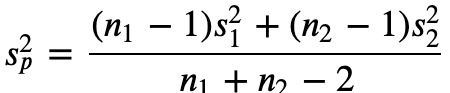


3. **Standard Deviation (SD)**
    * Square root of the variance.
    * Easier to interpret because it’s in the same unit as the data.
    * Example: If test scores have mean 70 and SD = 10, most scores fall within ~10 points of the mean.
4. **Interquartile Range (IQR)**
    * Range of the middle 50% of the data (between Q1 and Q3).
    * Helps reduce the effect of outliers.

#### Quick Summary
* __Variability__ = how spread out the data is.
* __Range →__ simplest measure.
* __Variance & Standard Deviation →__ most common, tell how far values are from the mean.
* __IQR →__ focuses on the middle spread, ignores extremes.

👉 So, variability is essential because it shows **consistency vs. diversity** in the data.


In [5]:
""" Create a DataFrame with different types of distributions for practice """
from scipy.stats import skewnorm
np.random.seed(seed=1)
size=800

X1 = np.random.normal(loc=40, scale=2, size=int(size/2) )
X2 = np.random.normal(loc=10, scale=4, size=int(size/2) ) 
bi_modal = np.concatenate([X1, X2])

X1 = np.random.normal(loc=40, scale=4, size=int(size/4) )
X2 = np.random.normal(loc=10, scale=4, size=int(size/4) ) 
X3 = np.random.normal(loc=0, scale=2, size=int(size/4) ) 
X4 = np.random.normal(loc=80, scale=2, size=int(size/4) ) 
multi_modal = np.concatenate([X1, X2, X3, X4])


df = pd.DataFrame(data={'Normal':np.random.normal(loc=0, scale=2, size=size),
                        "Positive Skewed": skewnorm.rvs(a=10, size=size),
                        "Negative Skewed": skewnorm.rvs(a=-10, size=size),
                        "Exponential":np.random.exponential(scale=20,size=size),
                        "Uniform":np.random.uniform(low=0.0, high=1.0, size=size),
                        "Bimodal":  bi_modal,
                        "Multimodal":  multi_modal,
                        "Poisson":np.random.poisson(lam=1.0, size=size),
                        "Discrete": np.random.choice([10,12,14,15,16,17,20],size=size),
                        }).round(3)

df.head(3)

Normal  Positive Skewed  Negative Skewed  Exponential  Uniform  Bimodal  \
0   0.582            0.340           -0.069       53.617    0.124   43.249   
1   2.150            1.181           -0.127        1.214    0.667   38.776   
2  -1.396            1.592           -0.288        4.921    0.014   38.944   

   Multimodal  Poisson  Discrete  
0      43.257        3        15  
1      43.122        0        16  
2      34.144        0        10

In [6]:
""" Add more normal distributions with different means and standard deviations """
df['NormalStd_1']= np.random.normal(loc=0, scale=1, size=size)
df['NormalStd_5']= np.random.normal(loc=0, scale=5, size=size)
df['NormalStd_10']= np.random.normal(loc=0, scale=10, size=size)

df.head(3)

Normal  Positive Skewed  Negative Skewed  Exponential  Uniform  Bimodal  \
0   0.582            0.340           -0.069       53.617    0.124   43.249   
1   2.150            1.181           -0.127        1.214    0.667   38.776   
2  -1.396            1.592           -0.288        4.921    0.014   38.944   

   Multimodal  Poisson  Discrete  NormalStd_1  NormalStd_5  NormalStd_10  
0      43.257        3        15     0.290063    -2.740917     14.434224  
1      43.122        0        16    -0.127012    -5.509209      0.132914  
2      34.144        0        10    -0.867103     8.143205     23.550284

# Variance

**Variance** measures how far data points spread out from the mean.
* In Pandas, use `.var()` to calculate it.
* By default, Pandas computes sample variance (not population variance), since full population data is rarely available.

In [7]:
df.var()

Normal               4.137334
Positive Skewed      0.339450
Negative Skewed      0.403699
Exponential        366.345112
Uniform              0.085860
Bimodal            236.540089
Multimodal         979.336972
Poisson              1.047295
Discrete             9.293678
NormalStd_1          0.983686
NormalStd_5         23.011071
NormalStd_10       100.622525
dtype: float64

# Standard Devation
**Standard deviation (σ)** measures how much data spreads out from the mean in both directions.
* t is the square root of the variance.
* In Pandas, calculate it with `.std()` (or use `np.sqrt(variance)`).

In [8]:
df.std()

Normal              2.034044
Positive Skewed     0.582623
Negative Skewed     0.635373
Exponential        19.140144
Uniform             0.293018
Bimodal            15.379860
Multimodal         31.294360
Poisson             1.023374
Discrete            3.048553
NormalStd_1         0.991809
NormalStd_5         4.796986
NormalStd_10       10.031078
dtype: float64

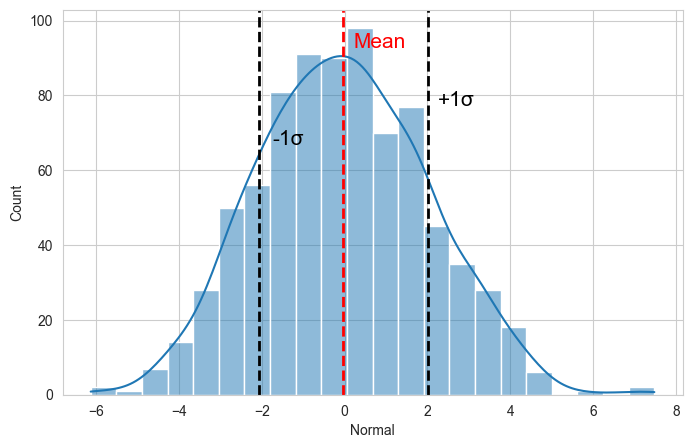

In [ ]:
""" Visualize Standard Deviation """
col = 'Normal'

fig, axes = plt.subplots(figsize=(8, 5))
sns.histplot(data=df, x=col, kde=True)

# Add lines and text for mean and std
plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
plt.text(x=df[col].mean() + df[col].std()/8, y=axes.get_ylim()
         [1] * 0.90, s='Mean', fontsize=15, c='r')

plt.axvline(df[col].mean() + df[col].std(), color='k',
            linestyle='dashed', linewidth=2)
plt.text(x=df[col].mean() + df[col].std() + df[col].std()/8,
         y=axes.get_ylim()[1] * 0.75, s='+1σ', fontsize=15, c='k')

plt.axvline(df[col].mean() - df[col].std(), color='k',
            linestyle='dashed', linewidth=2)
plt.text(x=-df[col].mean() - df[col].std() + df[col].std()/8,
         y=axes.get_ylim()[1] * 0.65, s='-1σ', fontsize=15, c='k')

plt.show()

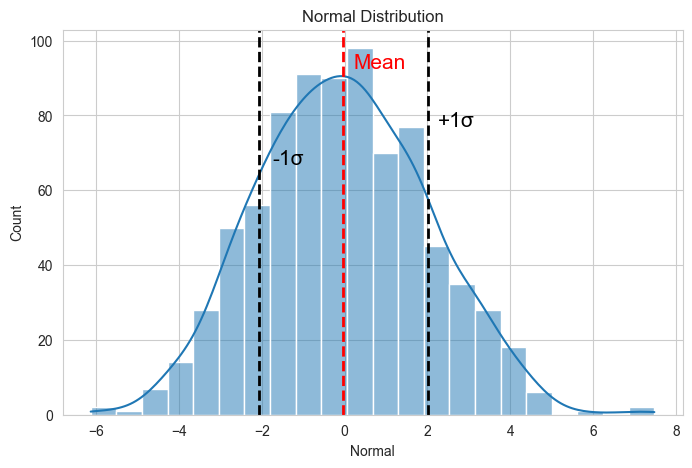

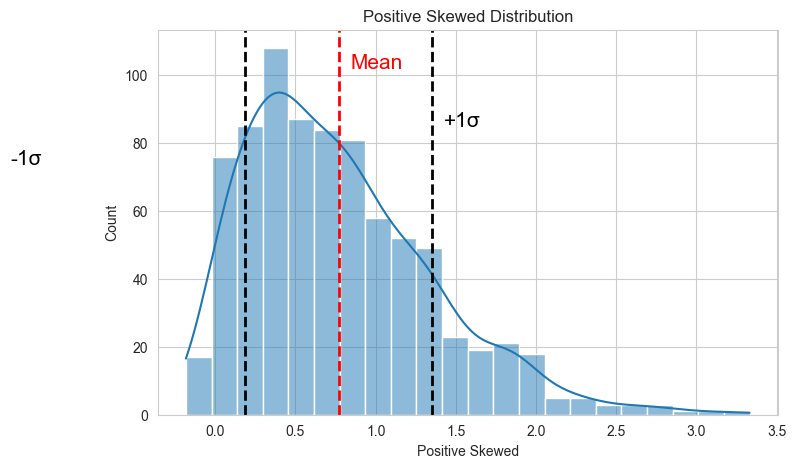

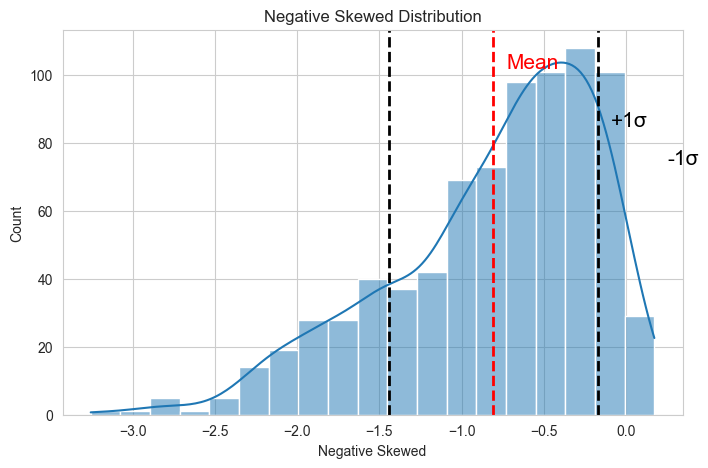

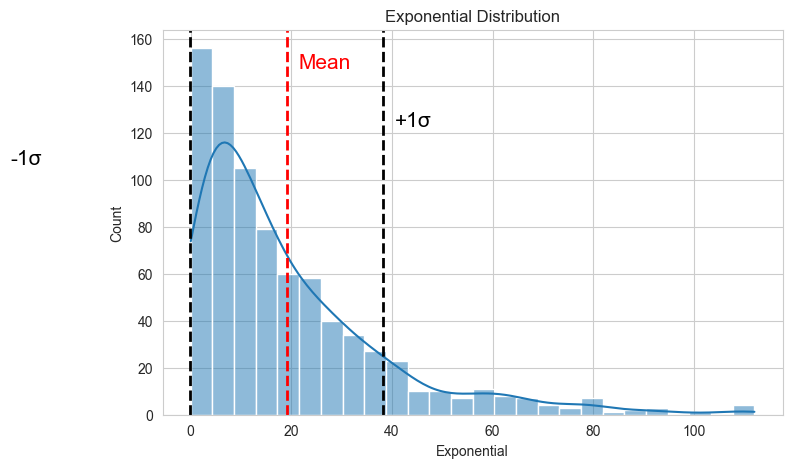

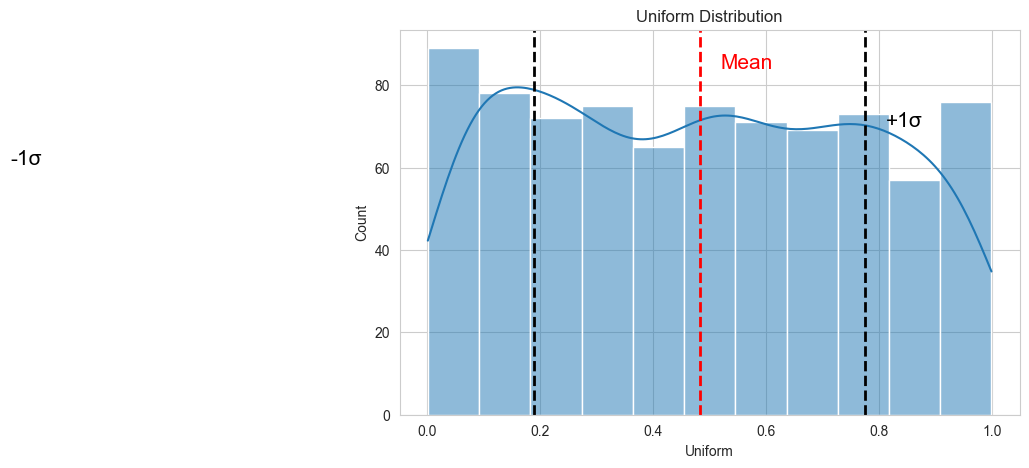

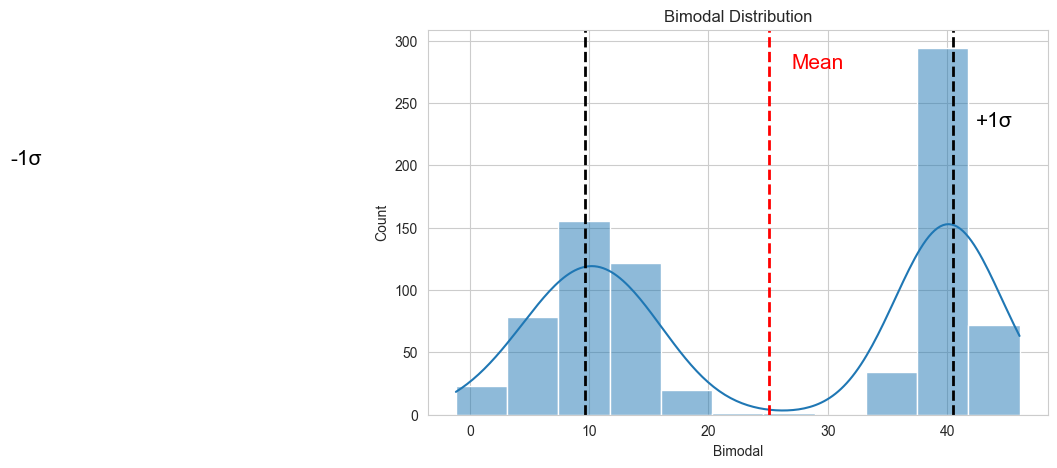

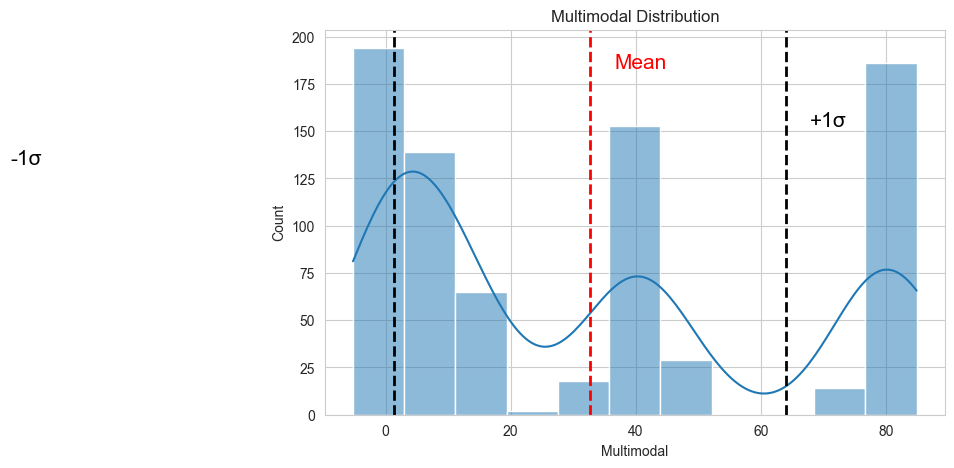

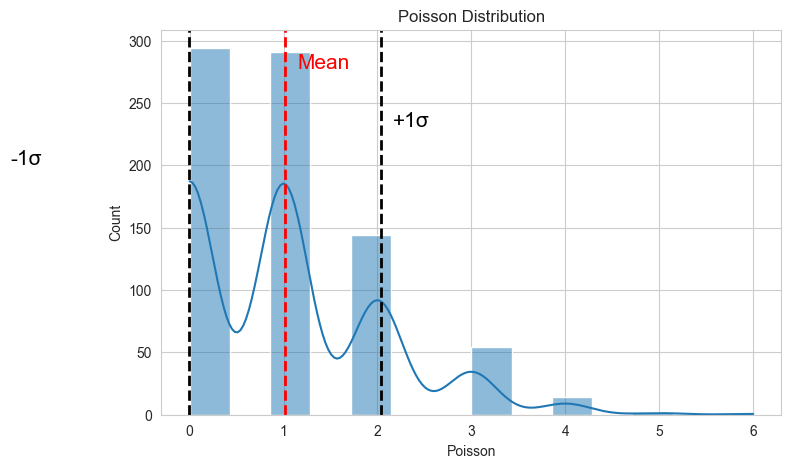

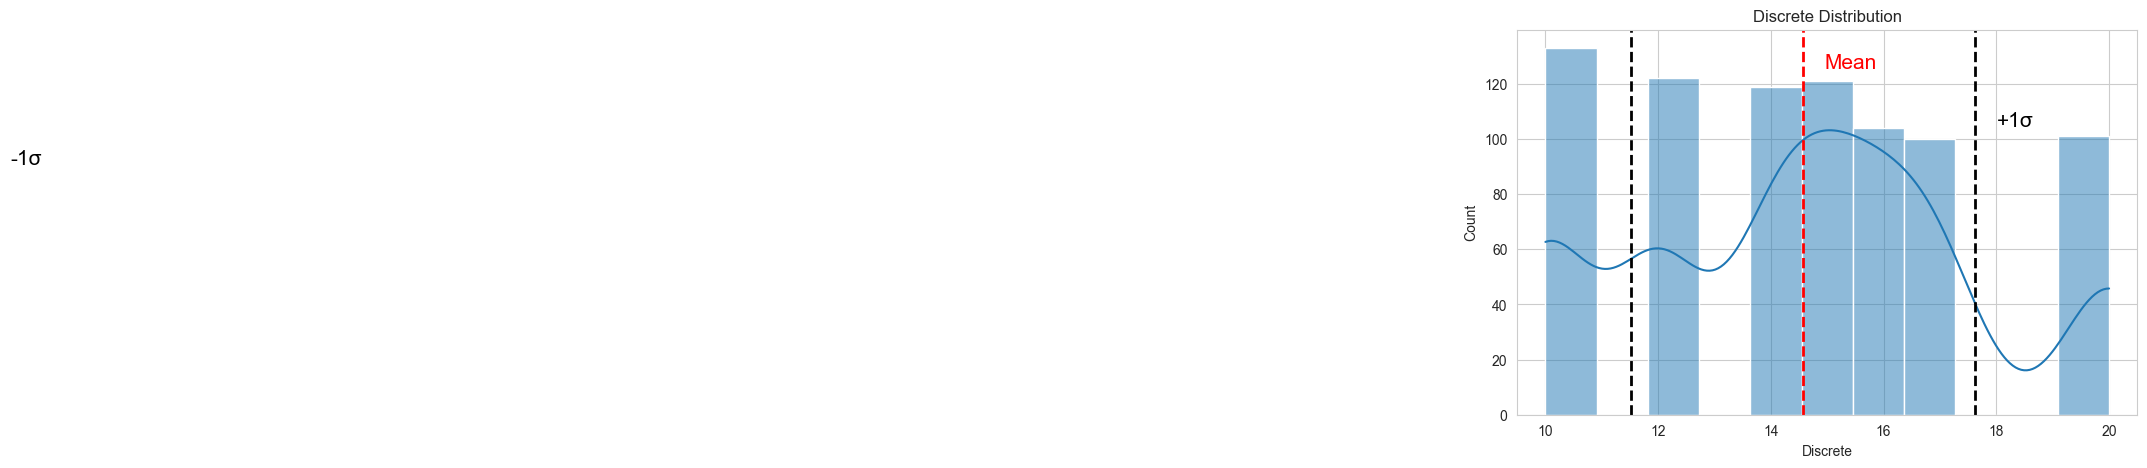

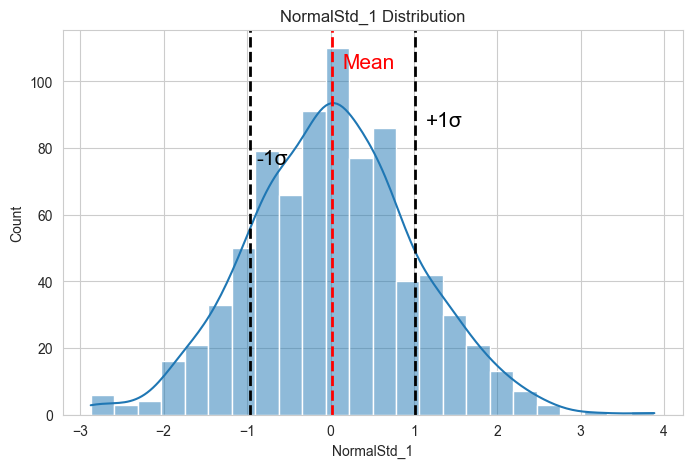

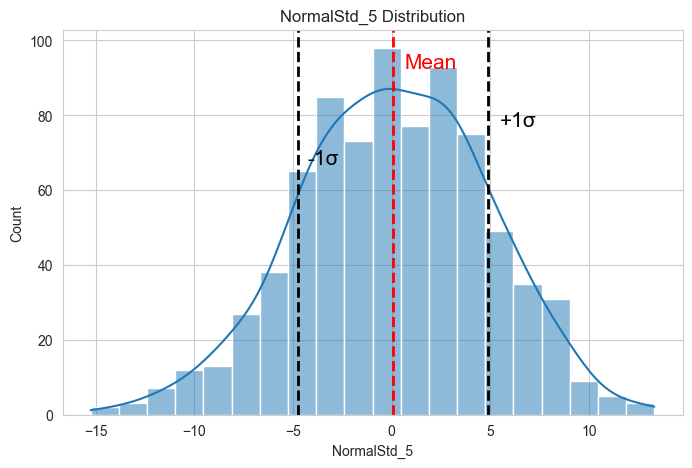

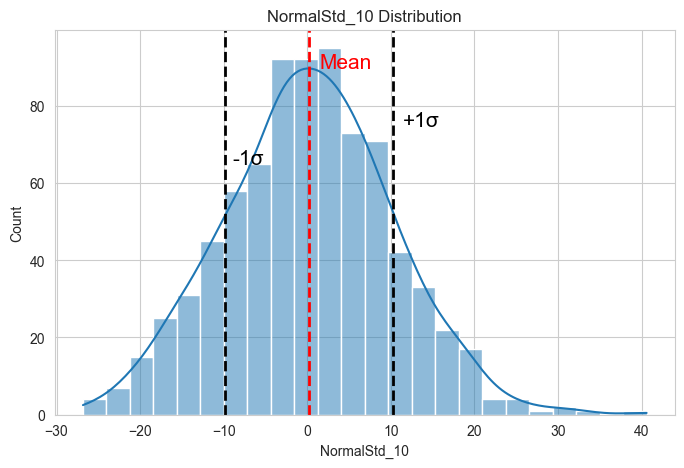

In [12]:
""" Visualize Standard Deviation for all columns """
for col in df.columns:

    fig, axes = plt.subplots(figsize=(8, 5))
    plt.title(f"{col} Distribution")
    sns.histplot(data=df, x=col, kde=True)

    # Create a red dashed vertical line at the mean value
    plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
    plt.text(x=df[col].mean() + df[col].std()/8, y=axes.get_ylim()
             [1] * 0.90, s='Mean', fontsize=15, c='r')

    # Create black dashed vertical lines at +1 and -1 standard deviation from the mean
    plt.axvline(df[col].mean() + df[col].std(), color='k',
                linestyle='dashed', linewidth=2)
    plt.text(x=df[col].mean() + df[col].std() + df[col].std()/8,
             y=axes.get_ylim()[1] * 0.75, s='+1σ', fontsize=15, c='k')

    plt.axvline(df[col].mean() - df[col].std(), color='k',
                linestyle='dashed', linewidth=2)
    plt.text(x=-df[col].mean() - df[col].std() + df[col].std()/8,
             y=axes.get_ylim()[1] * 0.65, s='-1σ', fontsize=15, c='k')

plt.show()
print("\n")

The **empirical rule** for normal distributions:
* **68%** of data lies within **1 standard deviation** of the mean.
* **95%** within **2 standard deviations**.
* **99.7%** within **3 standard deviations** (almost all data).

👉 Plotting the mean and ±3 standard deviations helps confirm this pattern in the data.


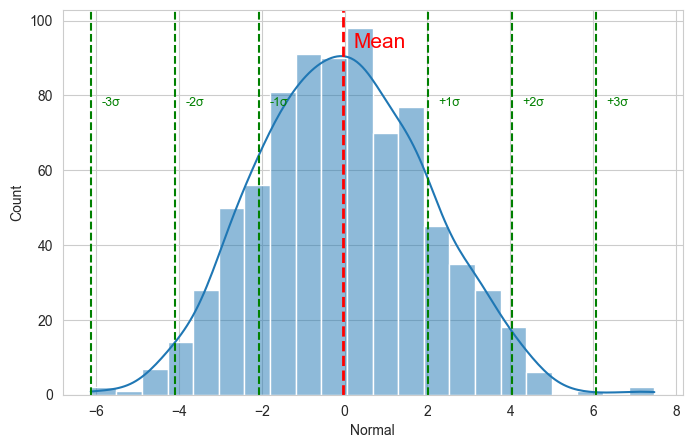

In [13]:
""" Visualize Standard Deviation with 1, 2, 3 std deviations """
col = 'Normal'

fig, axes = plt.subplots(figsize=(8, 5))
sns.histplot(data=df, x=col, kde=True)
plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
plt.text(x=df[col].mean() + df[col].std()/8, y=axes.get_ylim()
         [1] * 0.90, s='Mean', fontsize=15, c='r')

for num in [1, 2, 3]:
    plt.axvline(df[col].mean() + num * df[col].std(),
                color='g', linestyle='dashed', linewidth=1.5)
    plt.text(x=df[col].mean() + num * df[col].std() + df[col].std()/8,
             y=axes.get_ylim()[1] * 0.75, s=f'+{num}σ', fontsize=9, c='g')

    plt.axvline(df[col].mean() - num * df[col].std(),
                color='g', linestyle='dashed', linewidth=1.5)
    plt.text(x=df[col].mean() - num * df[col].std() + df[col].std()/8,
             y=axes.get_ylim()[1] * 0.75, s=f'-{num}σ', fontsize=9, c='g')


plt.show()

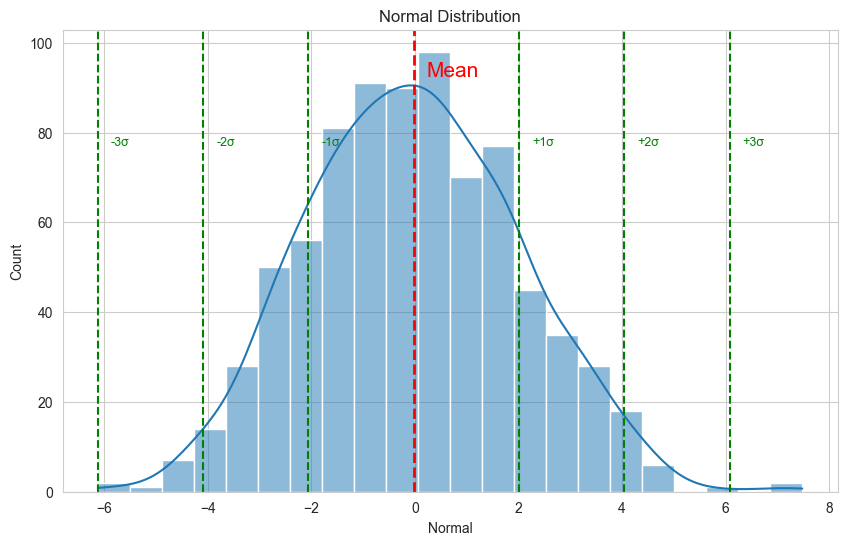

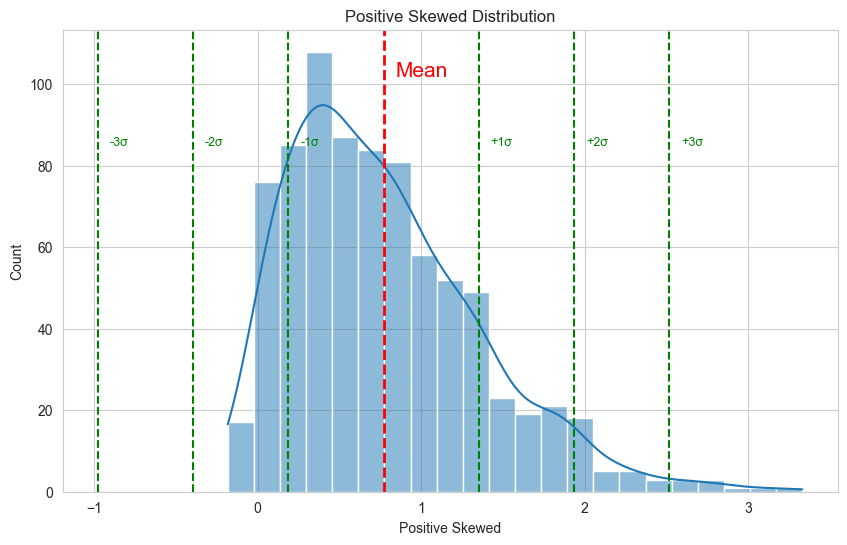

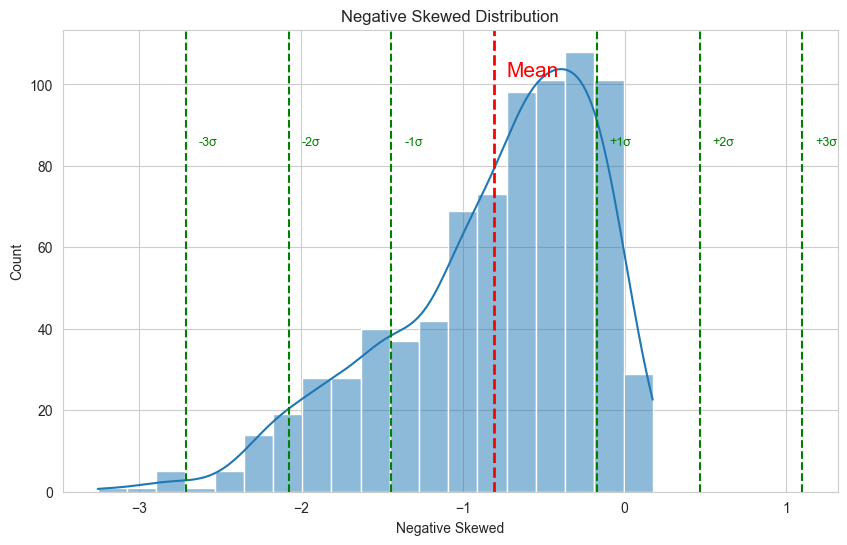

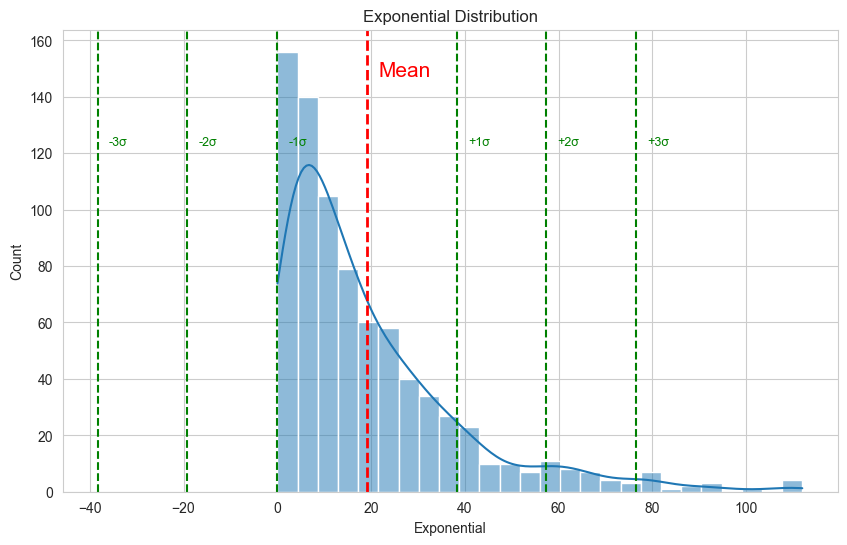

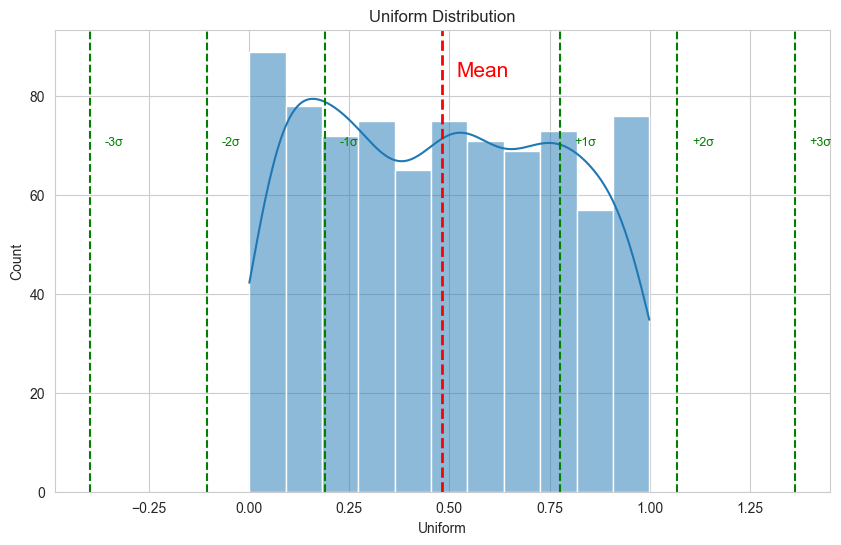

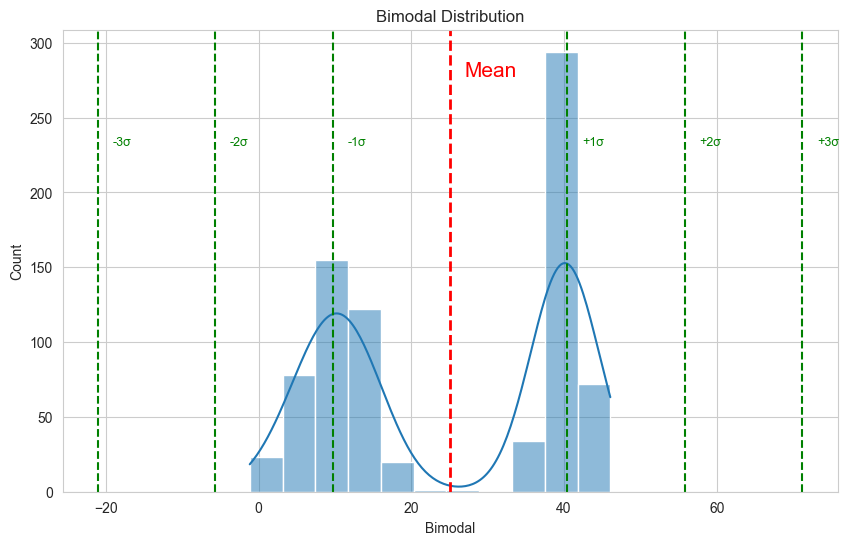

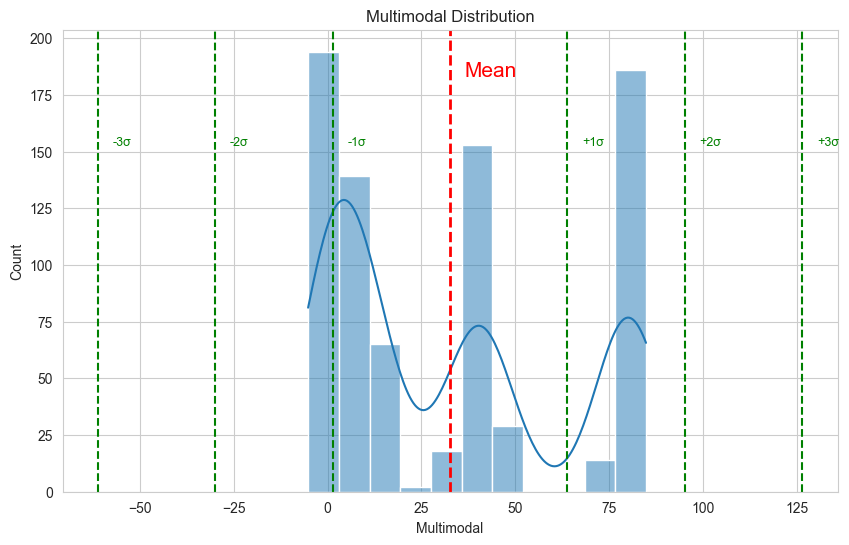

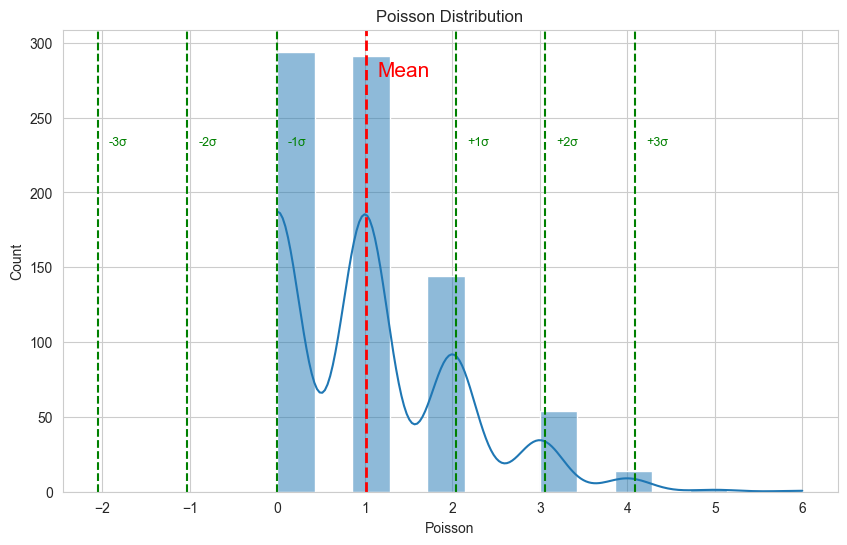

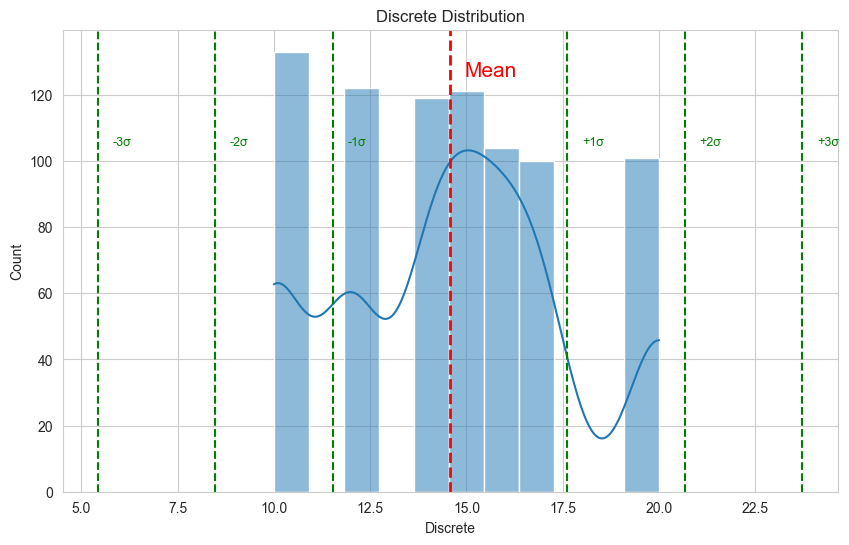

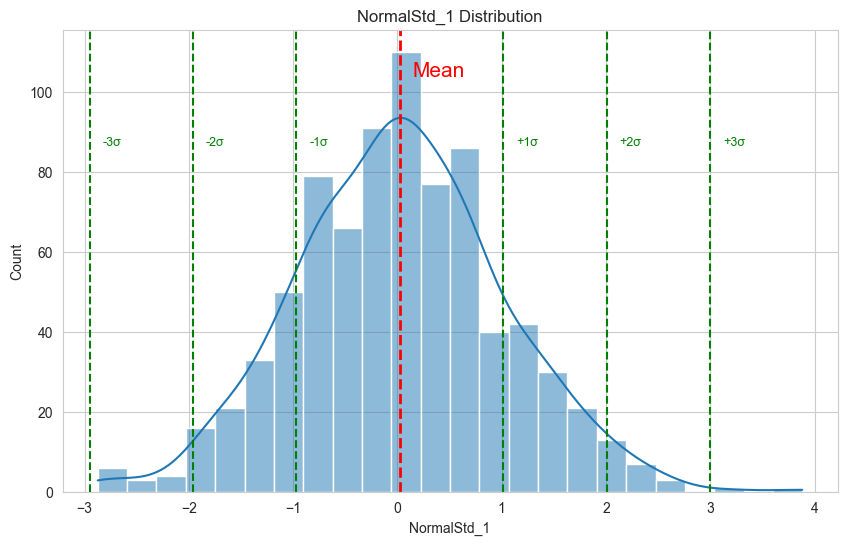

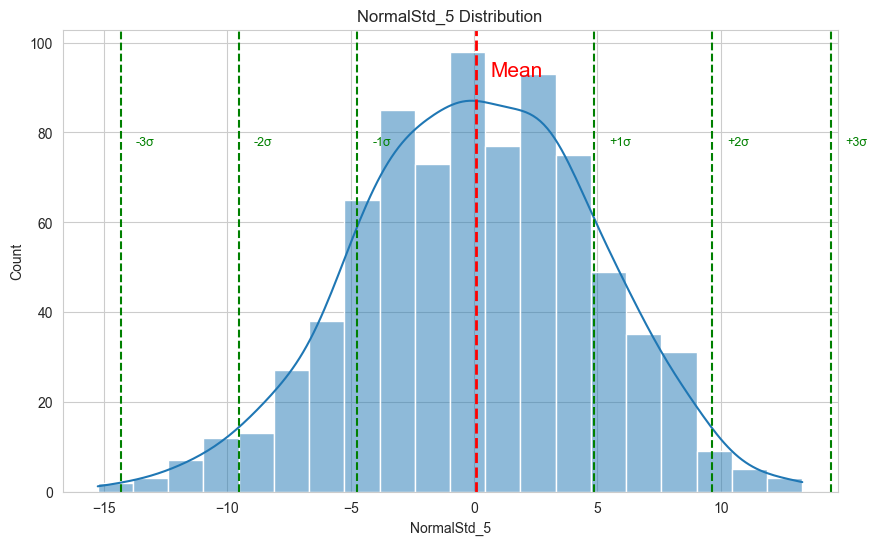

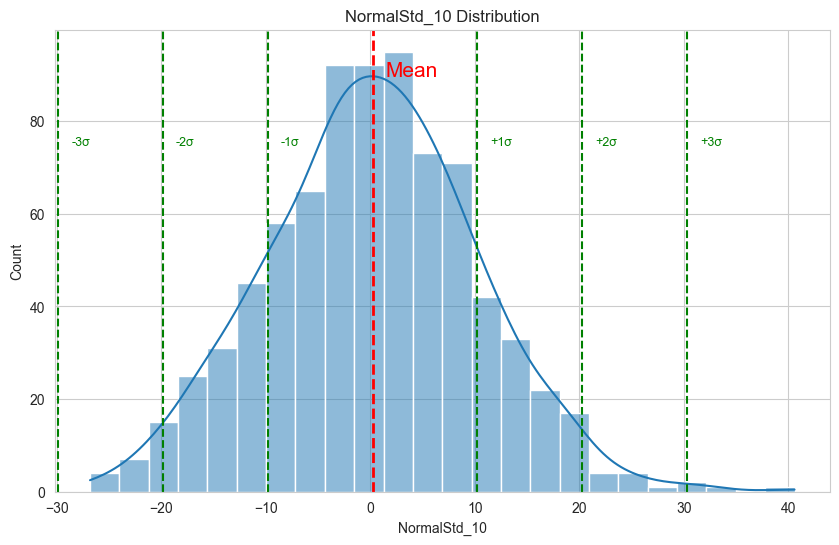

In [14]:
""" Visualize Standard Deviation with 1, 2, 3 std deviations for all columns """
for col in df.columns:

    fig, axes = plt.subplots(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"{col} Distribution")
    plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
    plt.text(x=df[col].mean() + df[col].std()/8, y=axes.get_ylim()
             [1] * 0.90, s='Mean', fontsize=15, c='r')

    for num in [1, 2, 3]:
        plt.axvline(df[col].mean() + num * df[col].std(),
                    color='g', linestyle='dashed', linewidth=1.5)
        plt.text(x=df[col].mean() + num * df[col].std() + df[col].std()/8,
                 y=axes.get_ylim()[1] * 0.75, s=f'+{num}σ', fontsize=9, c='g')

        plt.axvline(df[col].mean() - num * df[col].std(),
                    color='g', linestyle='dashed', linewidth=1.5)
        plt.text(x=df[col].mean() - num * df[col].std() + df[col].std()/8,
                 y=axes.get_ylim()[1] * 0.75, s=f'-{num}σ', fontsize=9, c='g')

    plt.show()
    print("\n")

# Skewness
**Skewness** measures the asymmetry of a distribution.
* **0 (or near 0) →** data is symmetric.
* **Positive skew →** longer tail on the right.
* **Negative skew →** longer tail on the left.
* Skewness often occurs when data has a **boundary** (e.g., values cannot go below 0).
* In Pandas, calculate with `.skew()`.

In [15]:
df.skew()

Normal             0.143826
Positive Skewed    0.984182
Negative Skewed   -0.891811
Exponential        1.863707
Uniform            0.067813
Bimodal           -0.080381
Multimodal         0.500373
Poisson            1.021067
Discrete           0.135004
NormalStd_1        0.073531
NormalStd_5       -0.127582
NormalStd_10       0.114864
dtype: float64

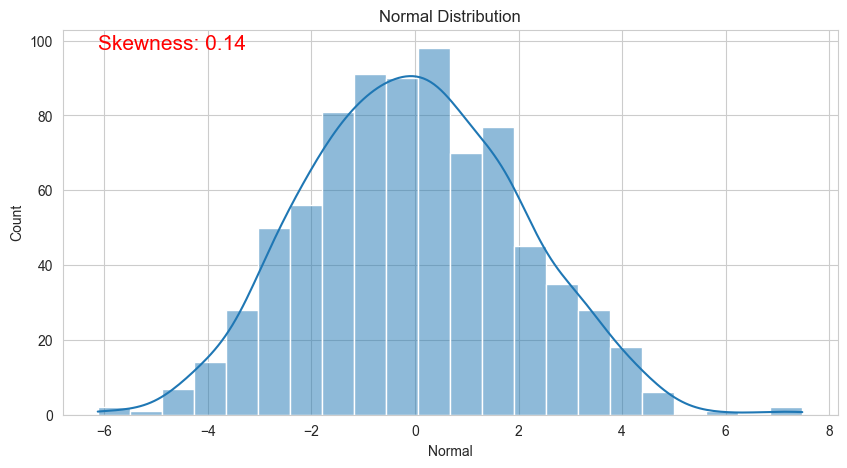

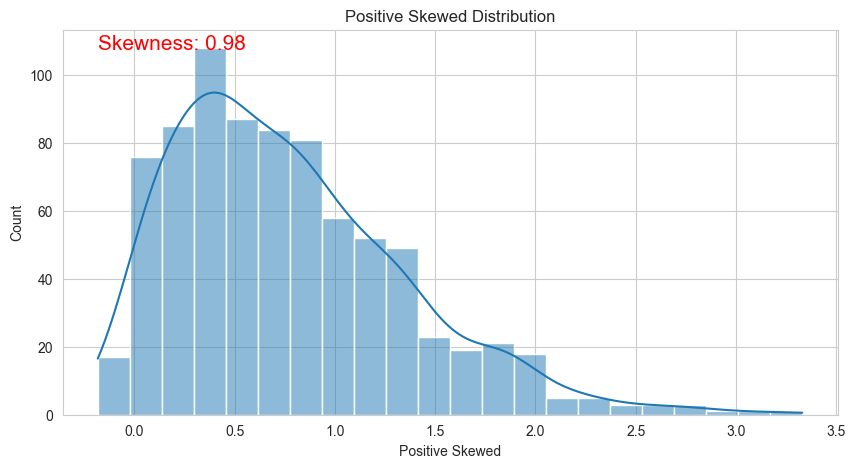

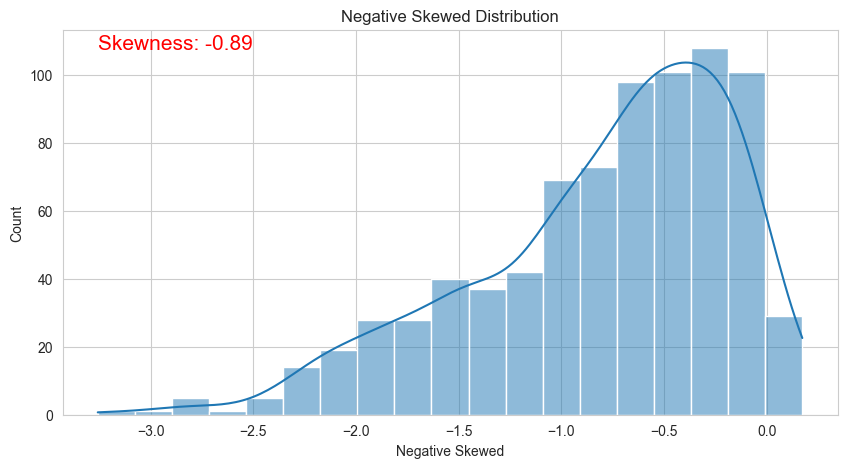

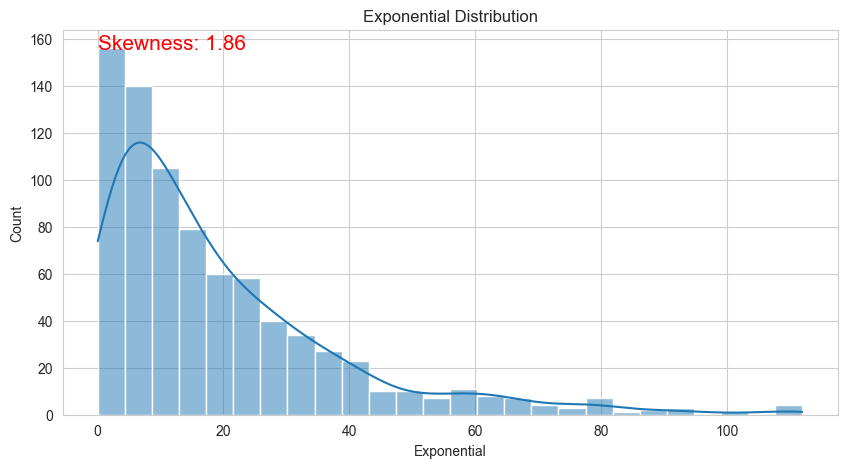

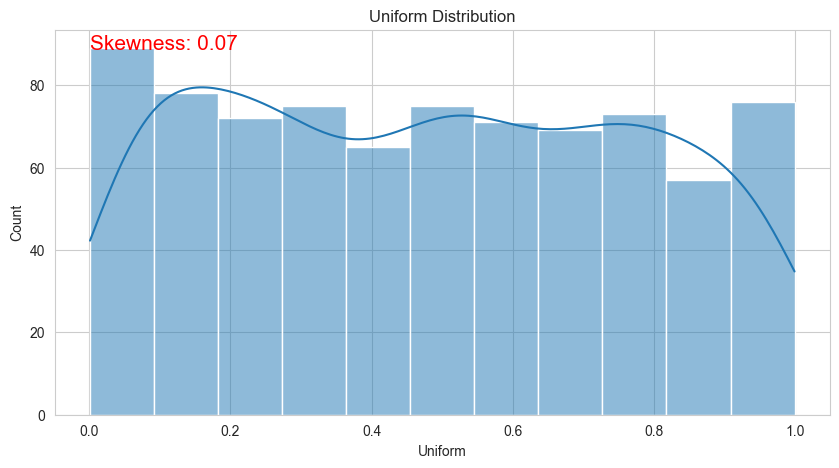

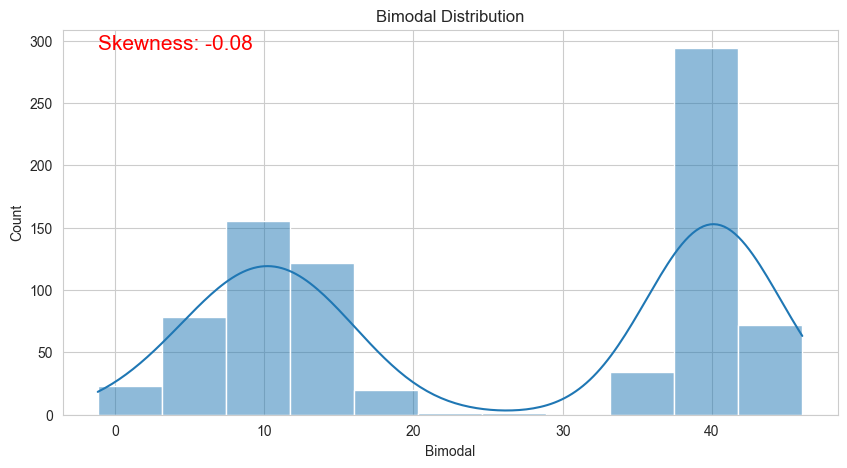

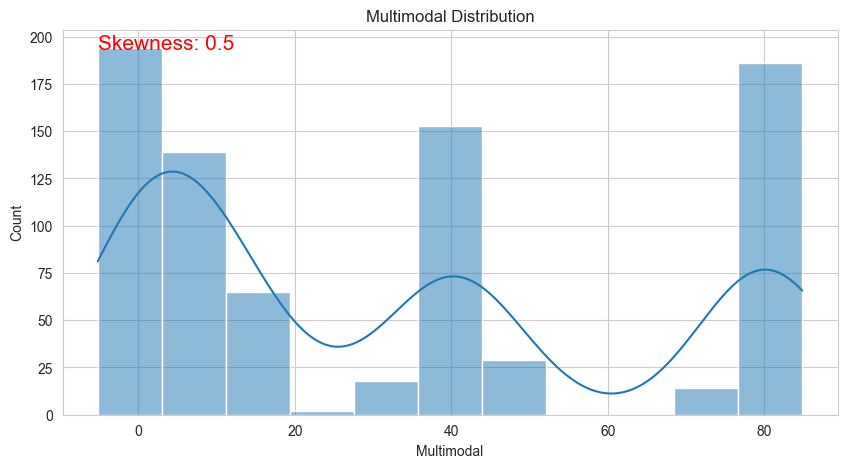

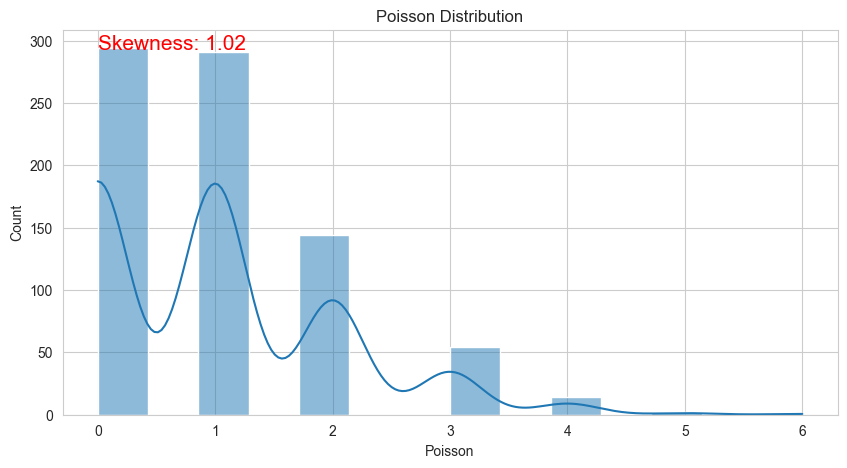

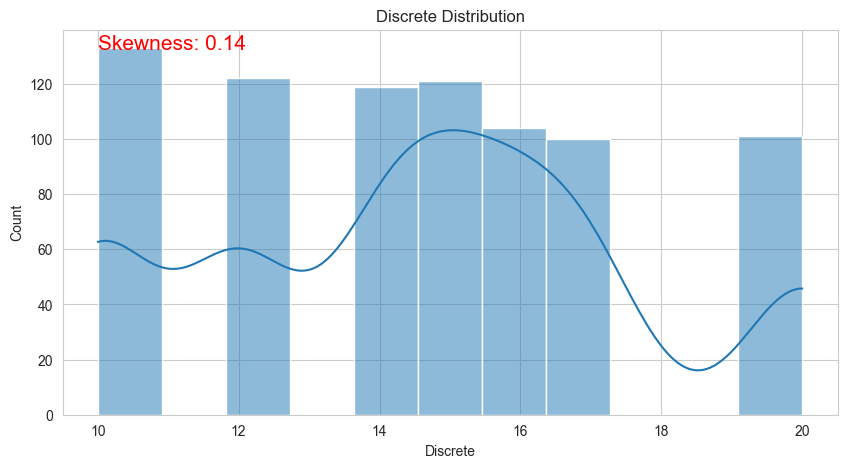

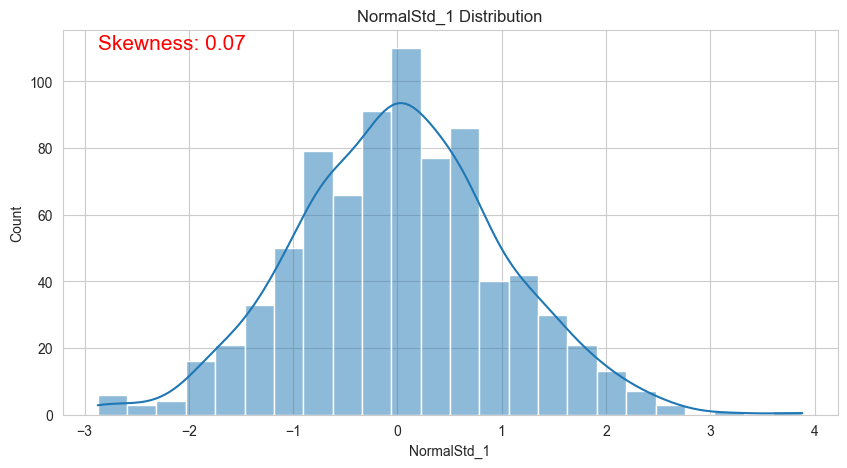

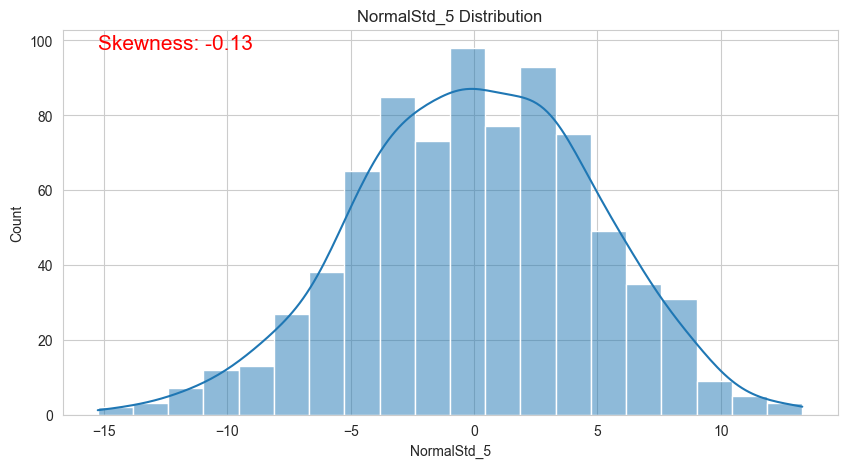

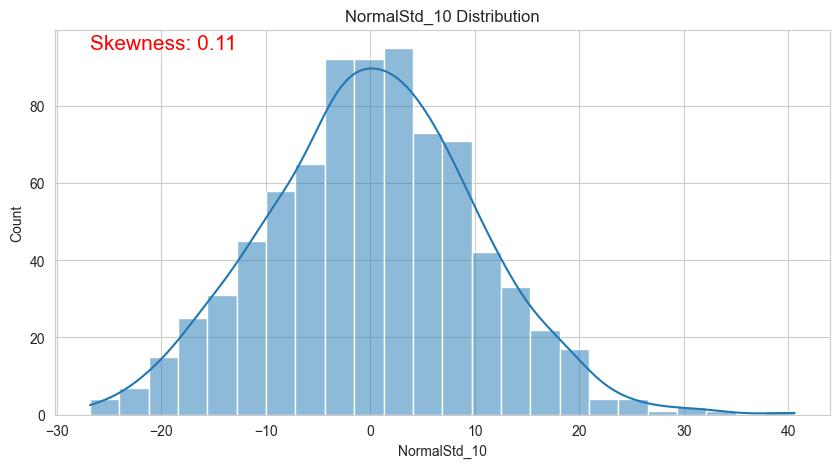

In [17]:
""" Visualize Skewness """
for col in df.columns:
    fig, axes = plt.subplots(figsize=(10, 5))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"{col} Distribution")
    
    # show skewness value on the plot
    plt.text(x=df[col].min(), y=axes.get_ylim()[1] * 0.95,
             s=f"Skewness: {df[col].skew().round(2)}", fontsize=15, c='r')
   
    plt.show()
    print("\n")

# Kurtosis
**Kurtosis** measures the heaviness of a distribution’s tails (outliers).
* **High kurtosis →** heavy tails, many outliers.
* **Low kurtosis →** light tails, few outliers.
* Outliers may be rare true values or errors.
* In Pandas, calculate with `.kurtosis()`.


In [18]:
df.kurtosis()

Normal            -0.134462
Positive Skewed    1.041101
Negative Skewed    0.283836
Exponential        4.065457
Uniform           -1.230196
Bimodal           -1.830466
Multimodal        -1.282046
Poisson            1.029801
Discrete          -0.747910
NormalStd_1        0.250878
NormalStd_5       -0.118906
NormalStd_10       0.165375
dtype: float64

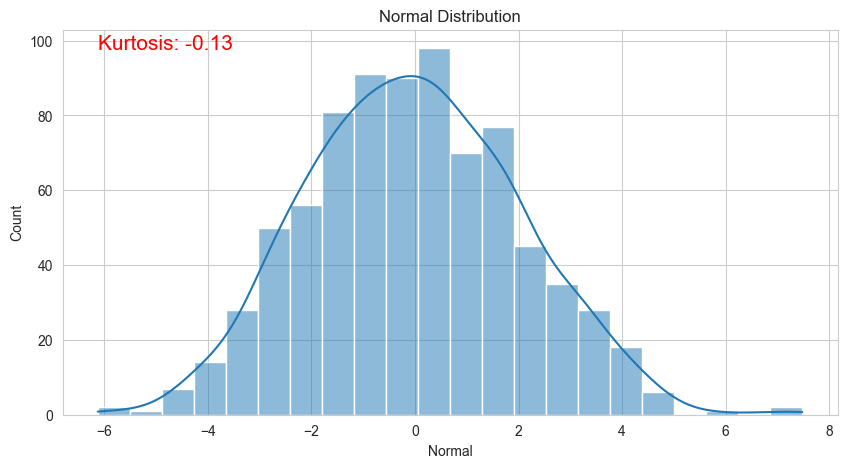

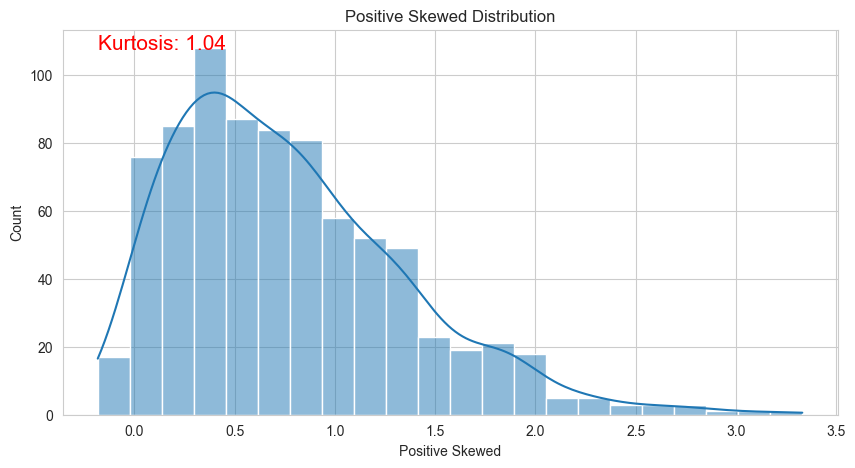

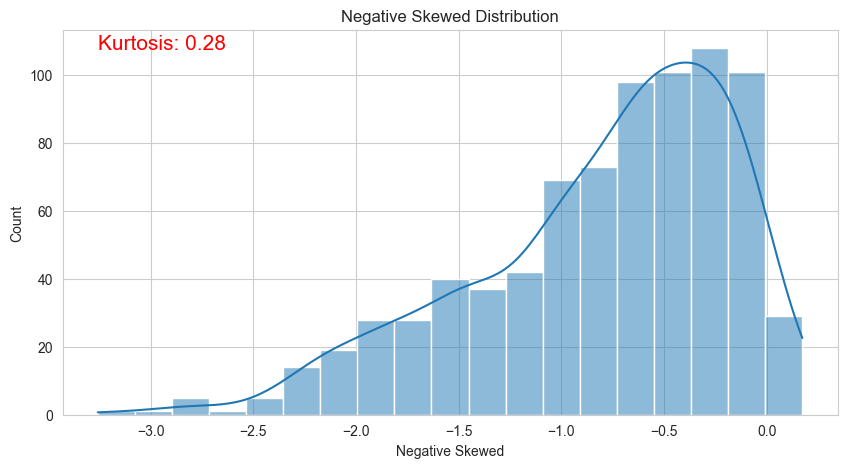

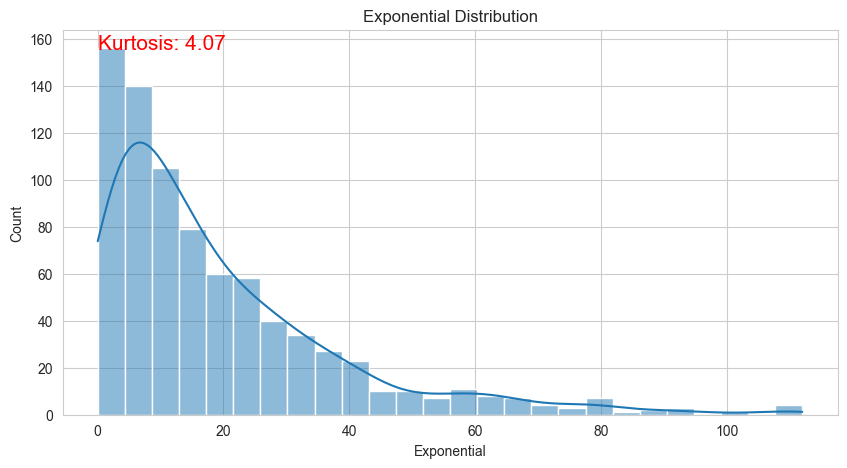

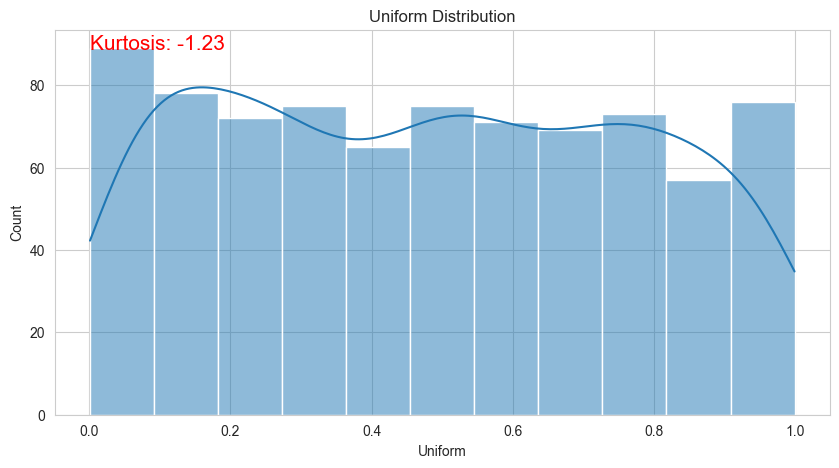

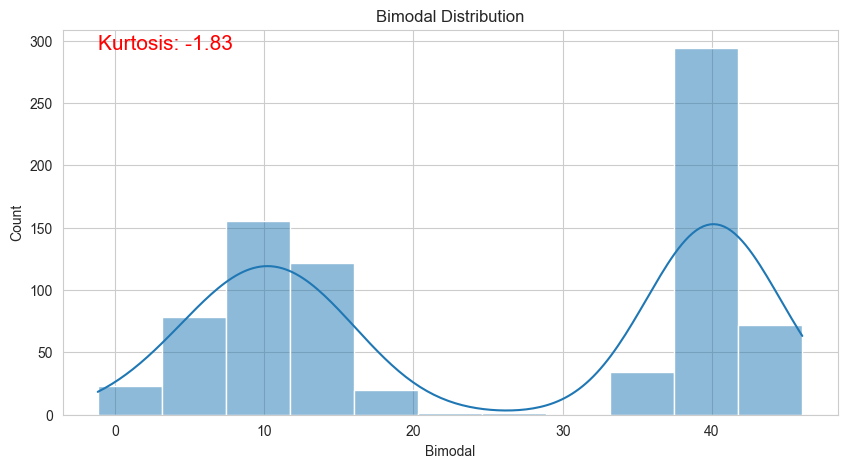

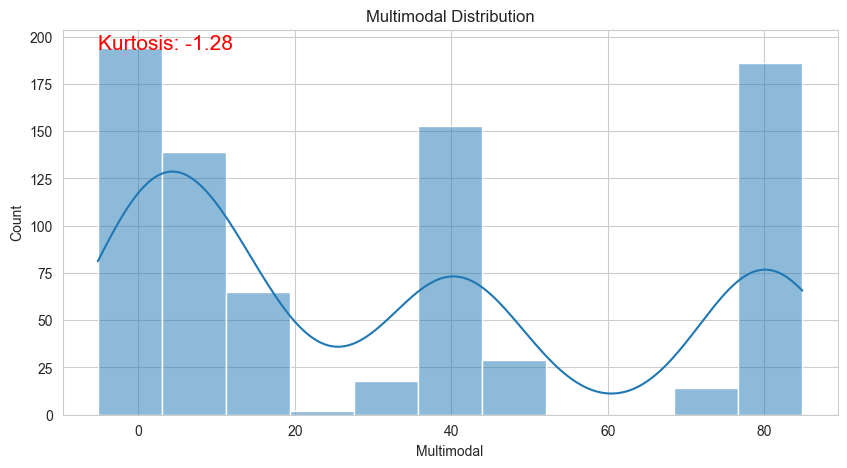

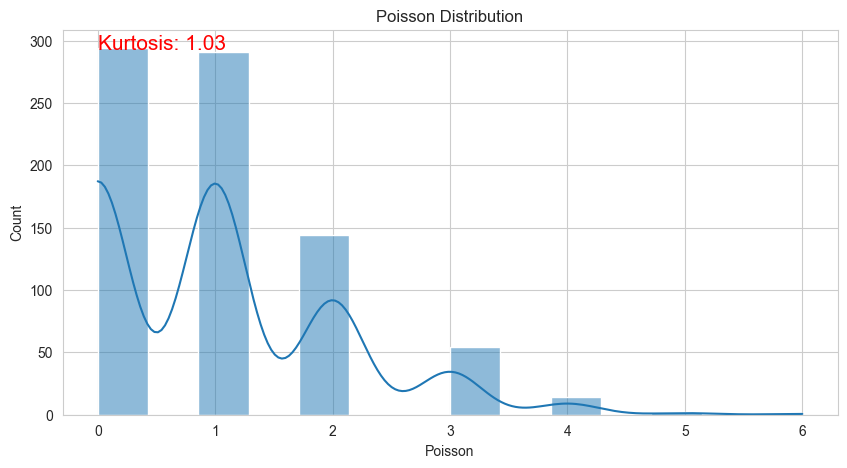

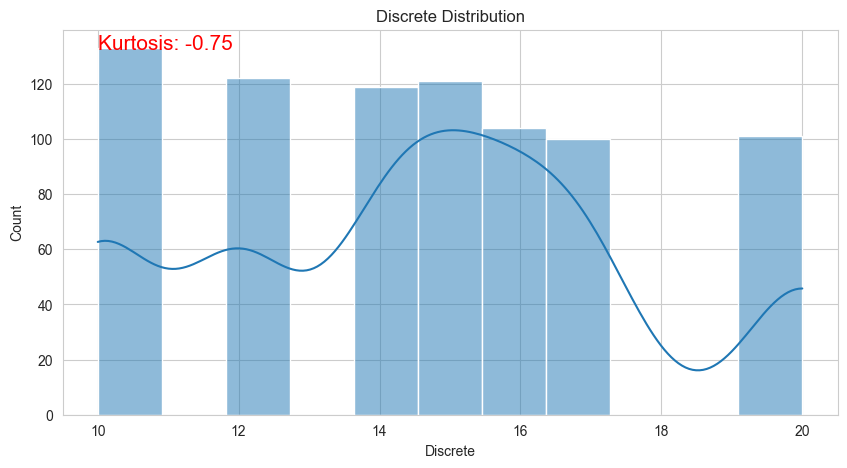

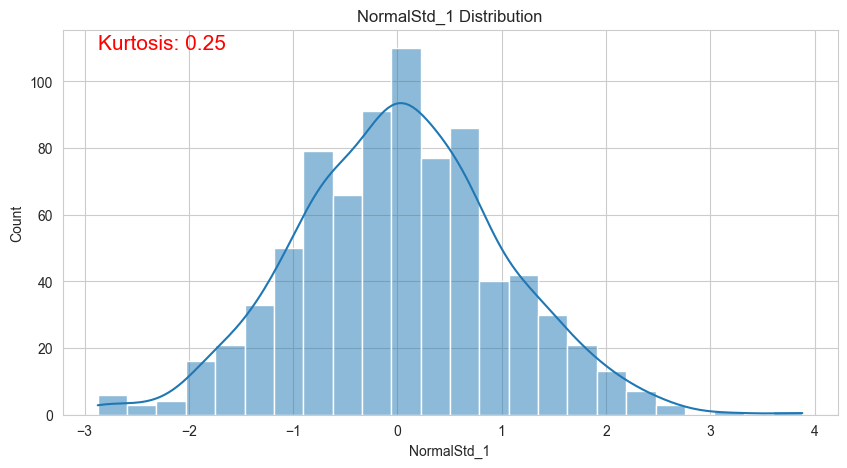

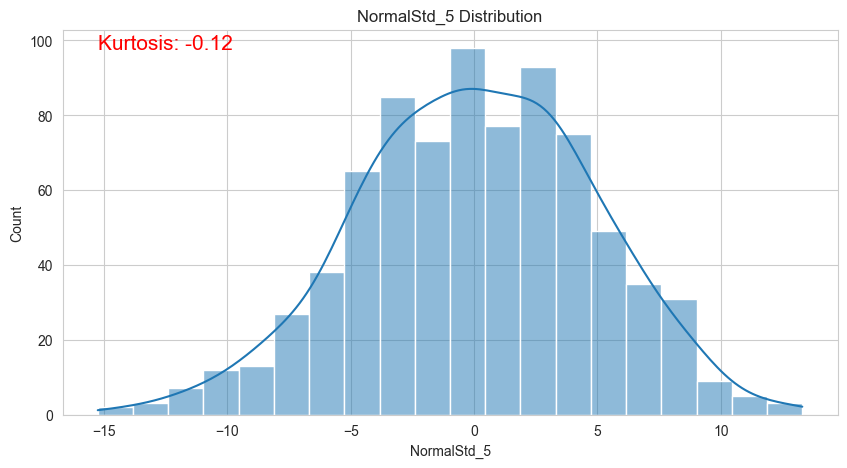

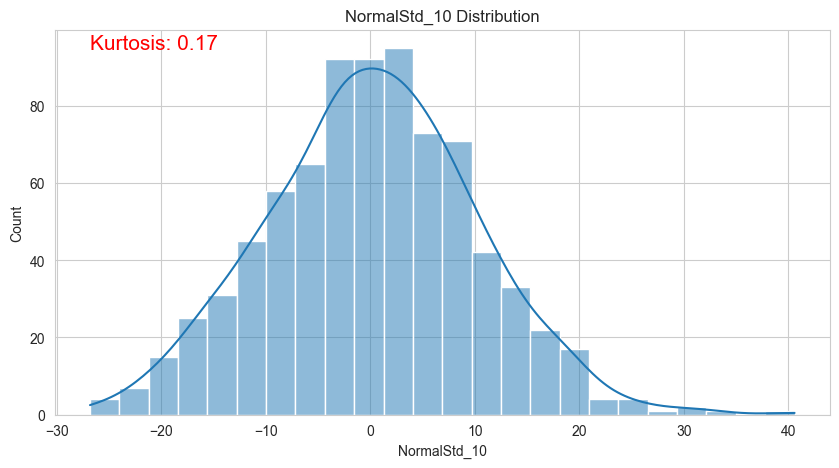

In [20]:
""" Visualize Kurtosis """
for col in df.columns:
    fig, axes = plt.subplots(figsize=(10, 5))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"{col} Distribution")

    # show kurtosis value on the plot
    plt.text(x=df[col].min(), y=axes.get_ylim()[1] * 0.95,
             s=f"Kurtosis: {df[col].kurtosis().round(2)}", fontsize=15, c='r')
    plt.show()

# Percentile and Quartile
**Percentiles** show the value below which a given percentage of data falls.
* Example: the **50th percentile** means 50% of values are below it.

**Quartiles** are special percentiles that split data into 4 equal parts:
* **Q1 (25th percentile)**
* **Q2 (50th percentile / median)**
* **Q3 (75th percentile)**

**Interquartile Range (IQR)** = Q3 – Q1 → shows the range where the middle 50% of data lies.

In Pandas, use `.quantile(q)` to calculate percentiles or quartiles (q ranges from 0 to 1, e.g., 0.25, 0.5, 0.75).

👉 In short: percentiles and quartiles help understand **data position and spread**.


In [21]:
df.quantile(q=[0,0.25,0.50,0.75,1])

Normal  Positive Skewed  Negative Skewed  Exponential  Uniform  \
0.00 -6.12800         -0.18300          -3.2580       0.0390  0.00100   
0.25 -1.50650          0.32900          -1.1695       5.5970  0.22025   
0.50 -0.07600          0.67650          -0.6535      12.9335  0.48450   
0.75  1.41975          1.09725          -0.3080      25.9745  0.73500   
1.00  7.48000          3.33100           0.1740     112.0070  0.99900   

       Bimodal  Multimodal  Poisson  Discrete  NormalStd_1  NormalStd_5  \
0.00  -1.16400    -5.20100      0.0      10.0    -2.874559   -15.249648   
0.25  10.01150     3.32525      0.0      12.0    -0.649605    -3.162660   
0.50  30.12400    24.02350      1.0      15.0     0.007958     0.097271   
0.75  40.08475    55.71025      2.0      17.0     0.657305     3.468861   
1.00  46.06200    84.84900      6.0      20.0     3.882189    13.307091   

      NormalStd_10  
0.00    -26.837837  
0.25     -6.438641  
0.50      0.135175  
0.75      6.817045  
1.00     40.603295

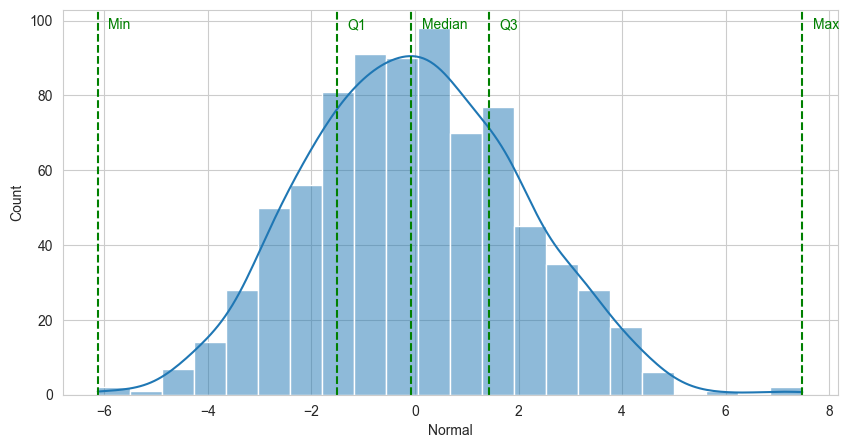

In [22]:
""" Visualize Quantiles """
col = 'Normal'
map = pd.Series(data=["Min","Q1","Median","Q3","Max"], index=[0,0.25,0.50,0.75,1])

fig, axes = plt.subplots(figsize=(10,5))
sns.histplot(data=df, x=col, kde=True)

# Add lines and text for quantiles
for quantile in [0, 0.25, 0.5, 0.75, 1]:
  plt.axvline(df[col].quantile(q=quantile), color='g', linestyle='dashed', linewidth=1.5)
  plt.text(x=df[col].quantile(q=quantile) + df[col].std()/10,
           y=axes.get_ylim()[1] * 0.95,
           s=f"{map[quantile]}", fontsize=10, c='g')

plt.show()

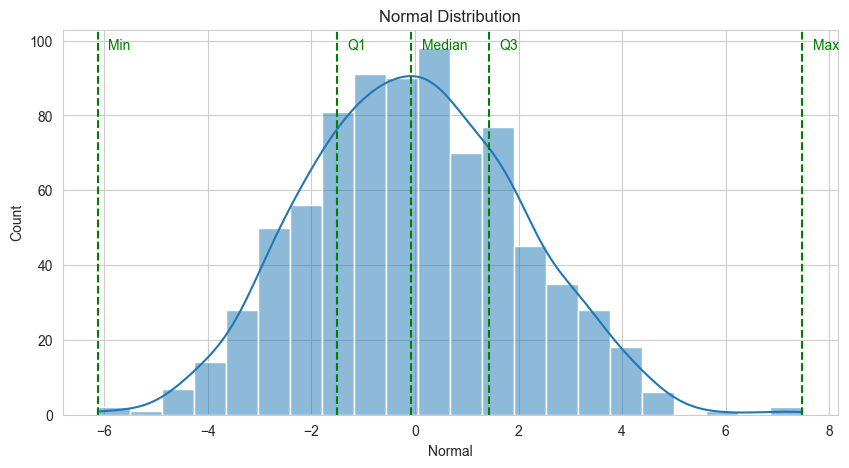

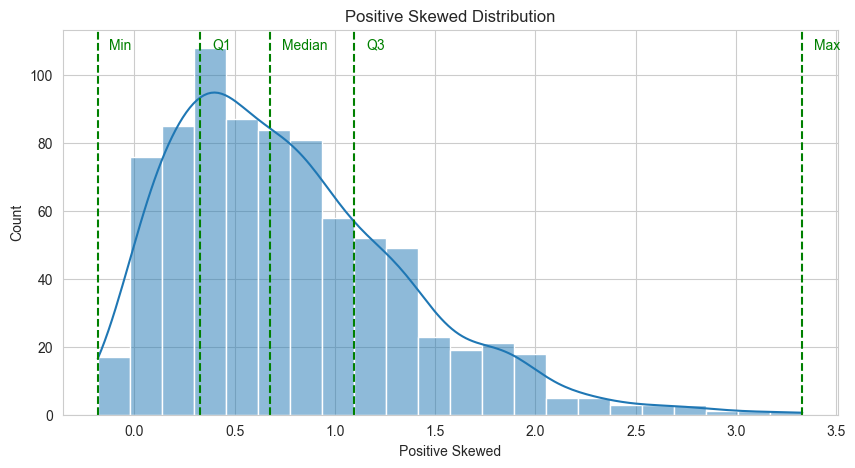

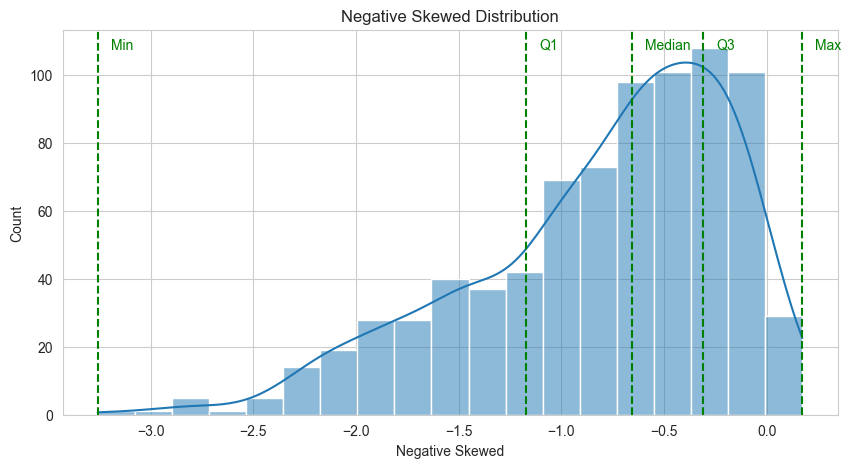

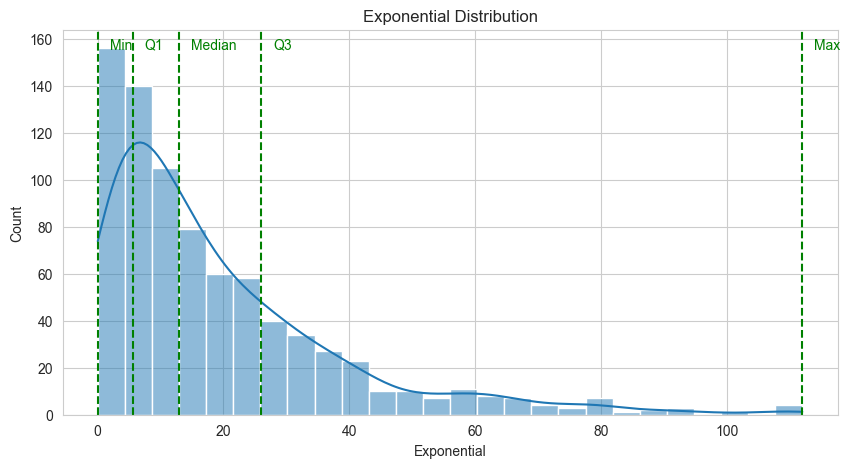

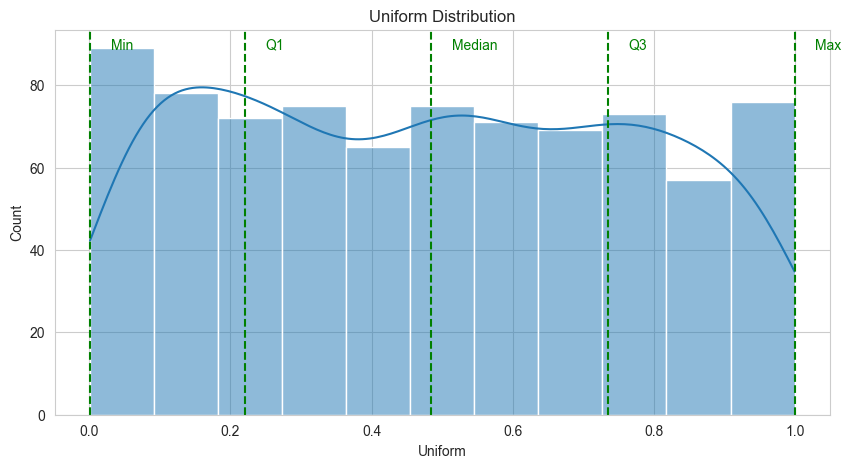

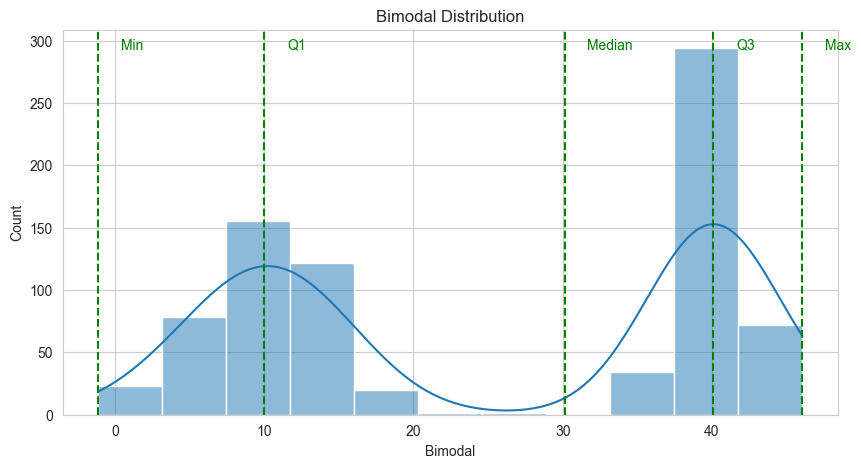

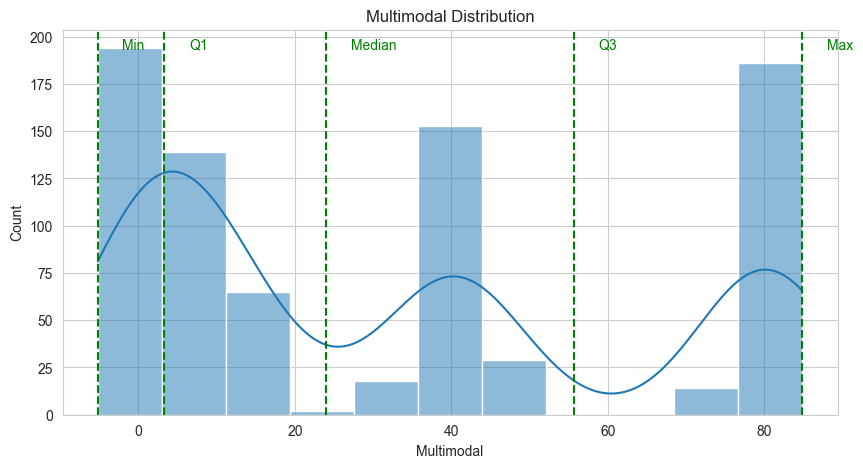

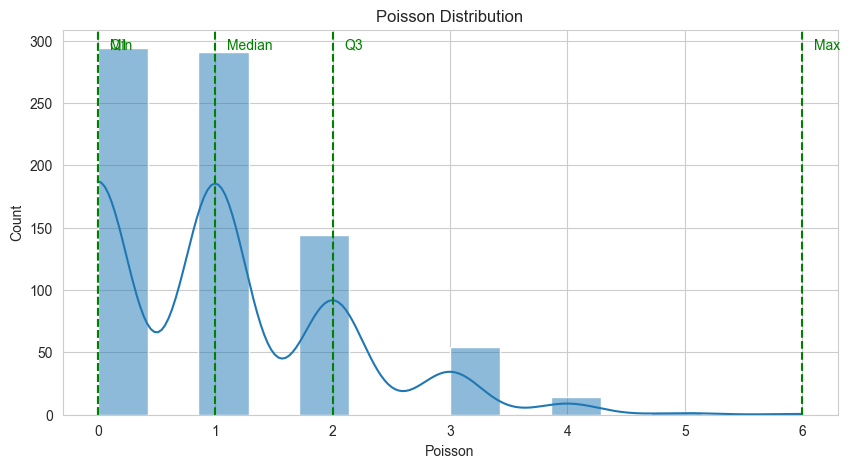

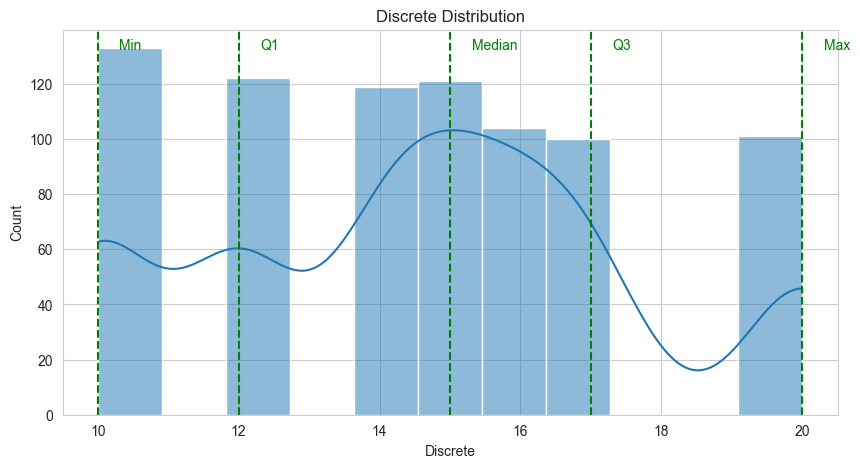

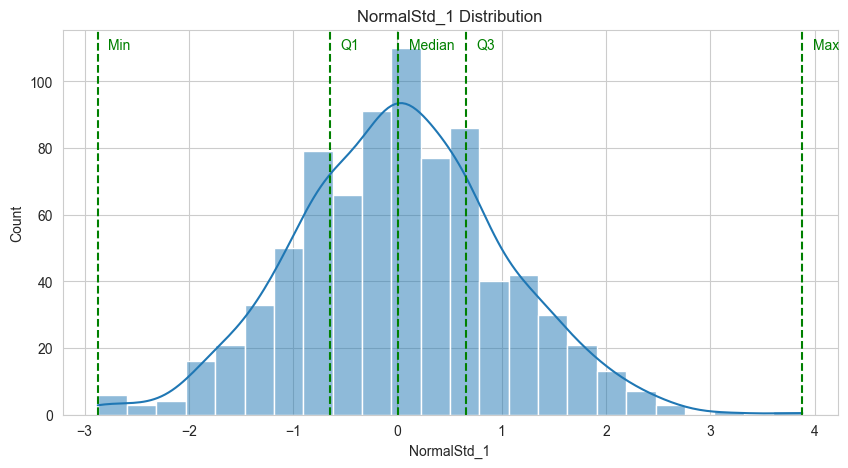

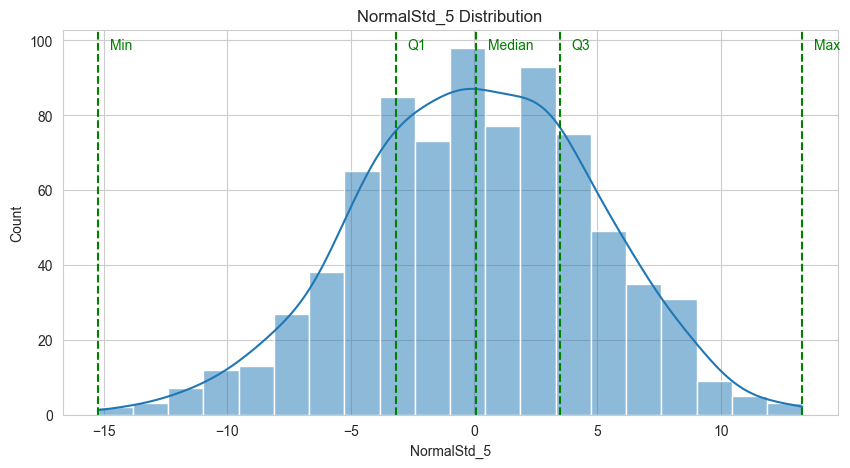

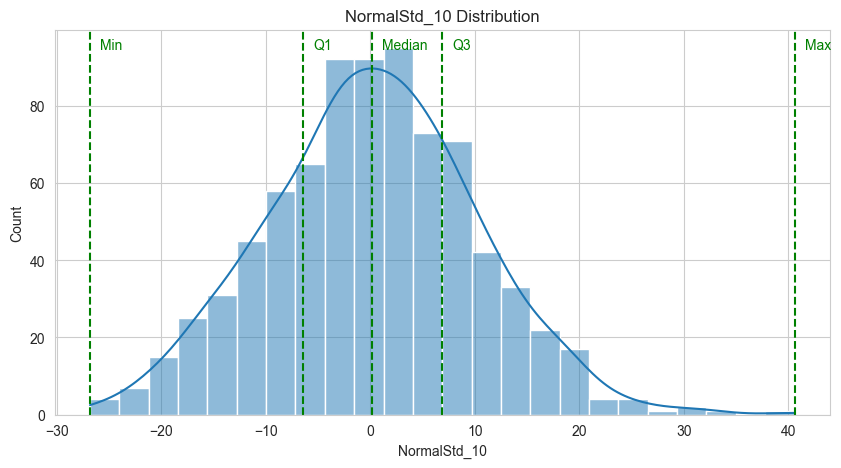

In [23]:
""" Visualize Quantiles for all columns  """
map = pd.Series(data=["Min", "Q1", "Median", "Q3", "Max"],
                index=[0, 0.25, 0.50, 0.75, 1])

for col in df.columns:
    fig, axes = plt.subplots(figsize=(10, 5))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"{col} Distribution")

    # Add lines and text for quantiles
    for quantile in [0, 0.25, 0.5, 0.75, 1]:
        plt.axvline(df[col].quantile(q=quantile), color='g',
                    linestyle='dashed', linewidth=1.5)
        plt.text(x=df[col].quantile(q=quantile) + df[col].std()/10,
                 y=axes.get_ylim()[1] * 0.95, s=f"{map[quantile]}", fontsize=10, c='g')

    plt.show()
    print("\n")

# QQ Plot
A **QQ plot (Quantile-Quantile plot)** compares the quantiles of two distributions.
* If data is **normally distributed**, points will align roughly in a straight line.
* It’s a **visual tool**, so interpretation can be somewhat subjective.
* Useful for detecting distributions that are **not normal**, including subtle **bimodal** or **multimodal** patterns that a regular histogram might miss.


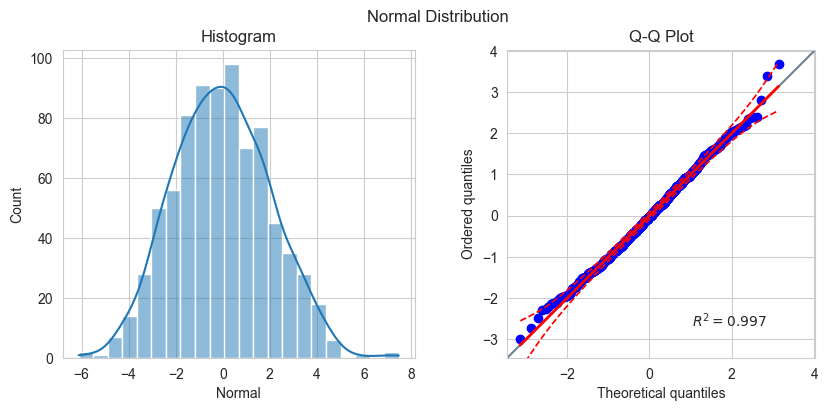

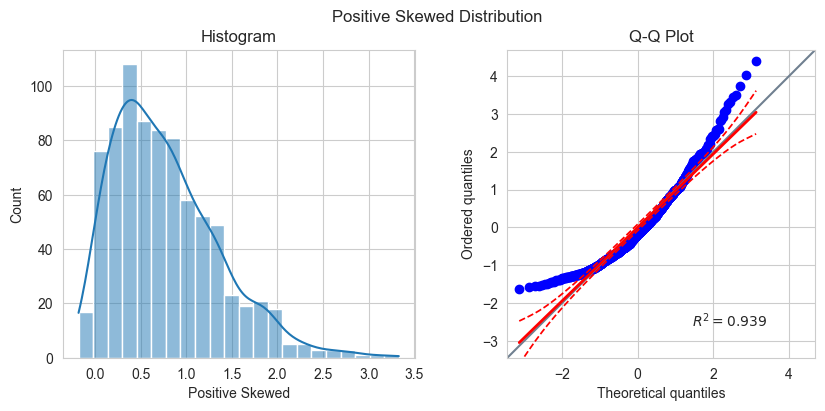

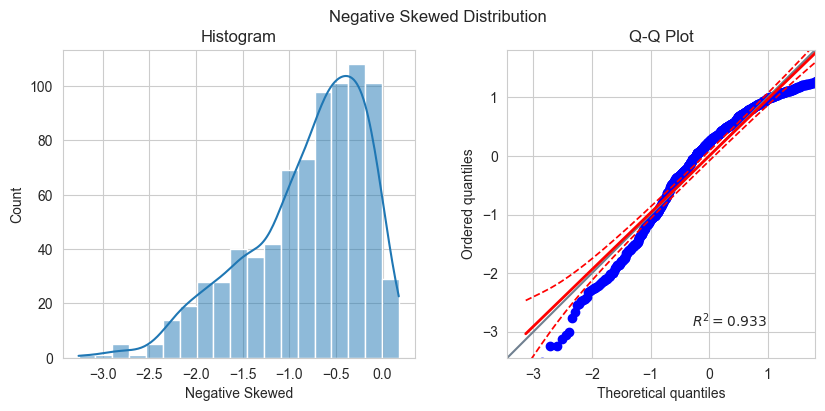

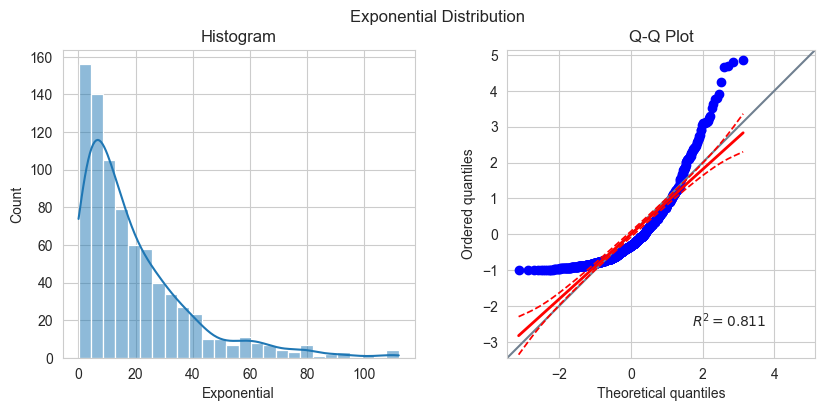

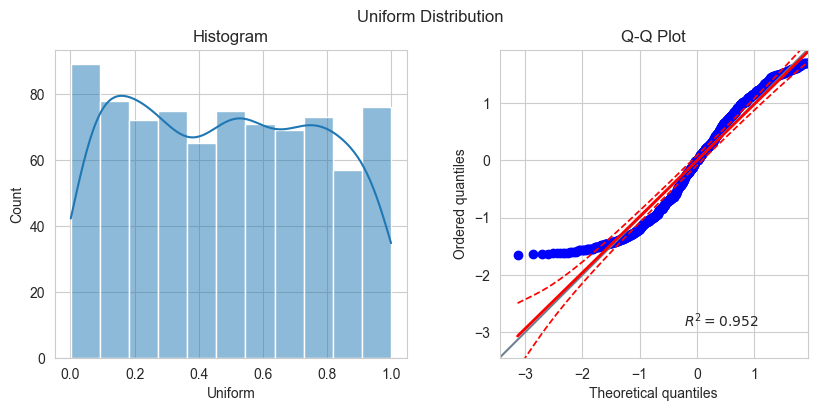

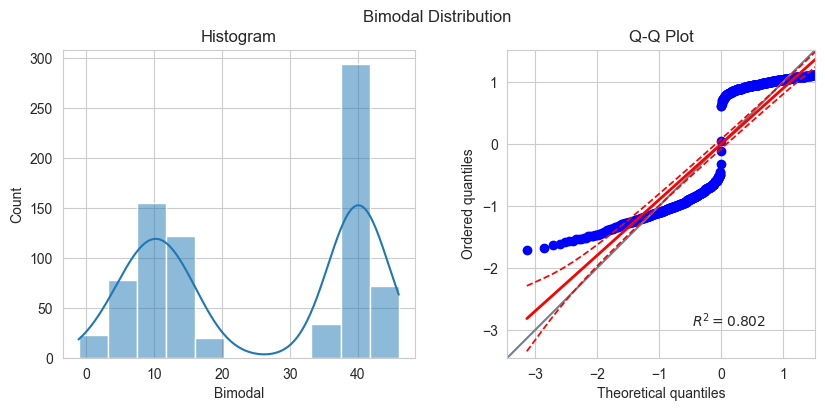

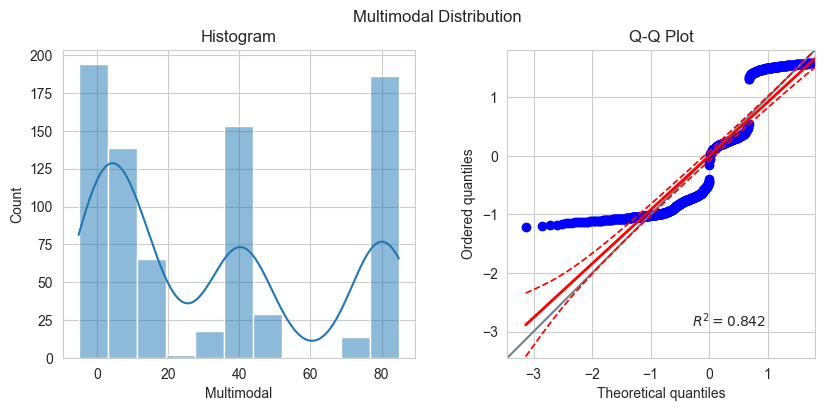

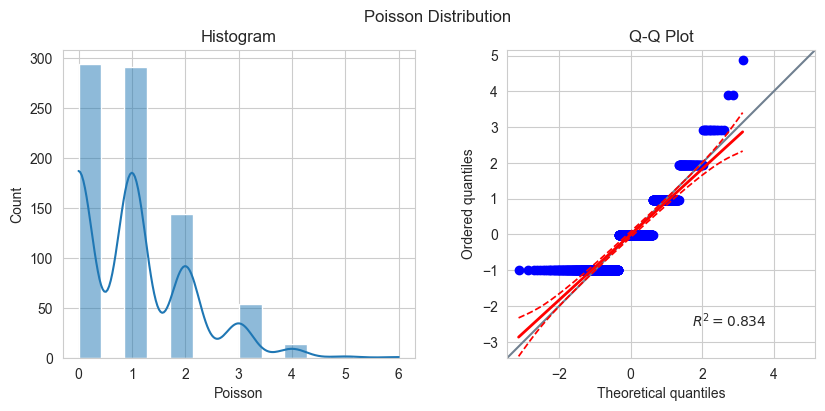

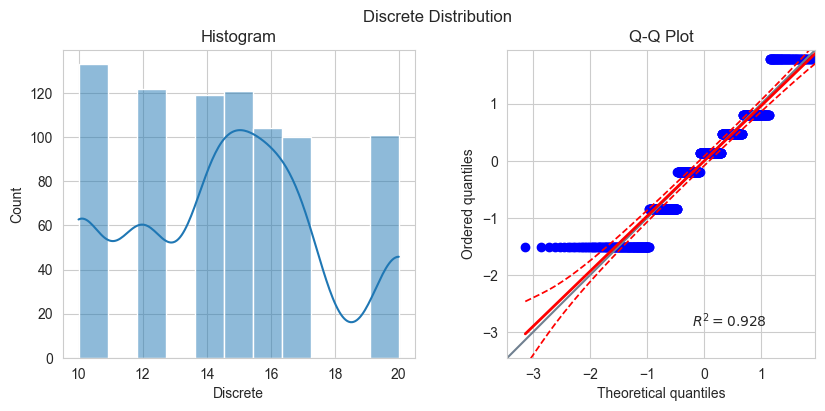

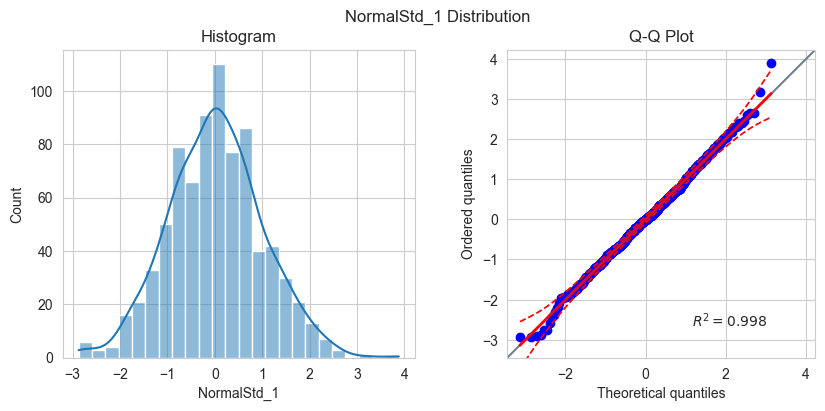

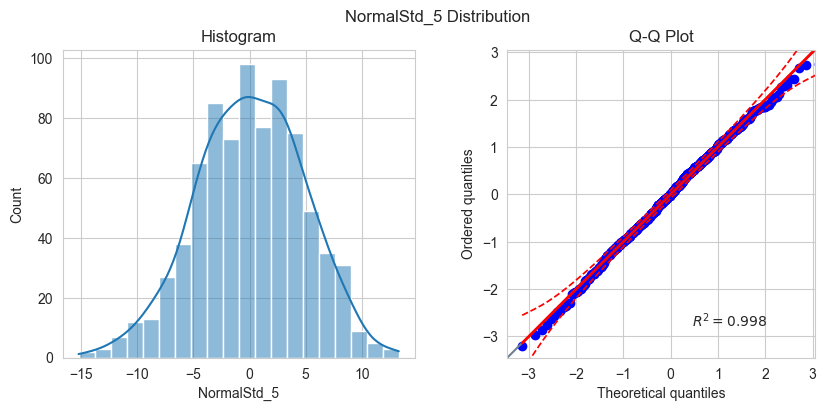

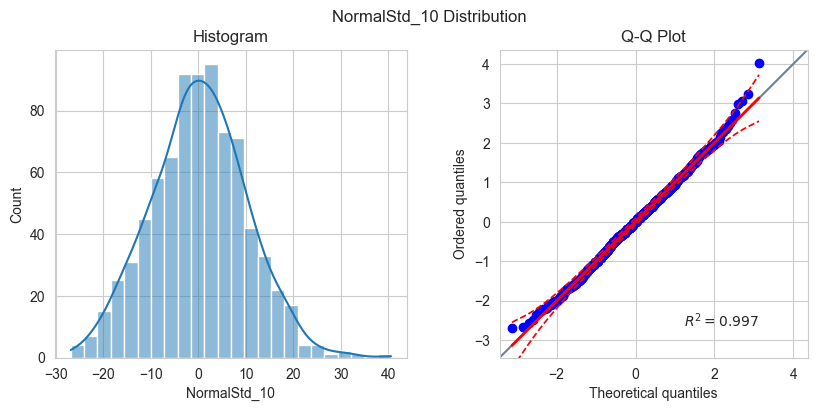

In [27]:
""" Visualize QQ Plot """
for col in df.columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    sns.histplot(data=df, x=col, kde=True, ax=axes[0])  # add histogram
    axes[0].set_title("Histogram")

    pg.qqplot(df[col], dist='norm', ax=axes[1])  # add QQ plot
    axes[1].set_title("Q-Q Plot")

    fig.suptitle(f"{col} Distribution")
    plt.show()
    print("\n")

# Range
**Range** = maximum value – minimum value.
* In Pandas, use `.min()` (for minimum) and `.max()` (for maximum) to calculate it.

In [31]:
df.min(), df.max()

(Normal             -6.128000
 Positive Skewed    -0.183000
 Negative Skewed    -3.258000
 Exponential         0.039000
 Uniform             0.001000
 Bimodal            -1.164000
 Multimodal         -5.201000
 Poisson             0.000000
 Discrete           10.000000
 NormalStd_1        -2.874559
 NormalStd_5       -15.249648
 NormalStd_10      -26.837837
 dtype: float64,
 Normal               7.480000
 Positive Skewed      3.331000
 Negative Skewed      0.174000
 Exponential        112.007000
 Uniform              0.999000
 Bimodal             46.062000
 Multimodal          84.849000
 Poisson              6.000000
 Discrete            20.000000
 NormalStd_1          3.882189
 NormalStd_5         13.307091
 NormalStd_10        40.603295
 dtype: float64)

In [32]:
range = df.max() - df.min()
range

Normal              13.608000
Positive Skewed      3.514000
Negative Skewed      3.432000
Exponential        111.968000
Uniform              0.998000
Bimodal             47.226000
Multimodal          90.050000
Poisson              6.000000
Discrete            10.000000
NormalStd_1          6.756748
NormalStd_5         28.556739
NormalStd_10        67.441133
dtype: float64

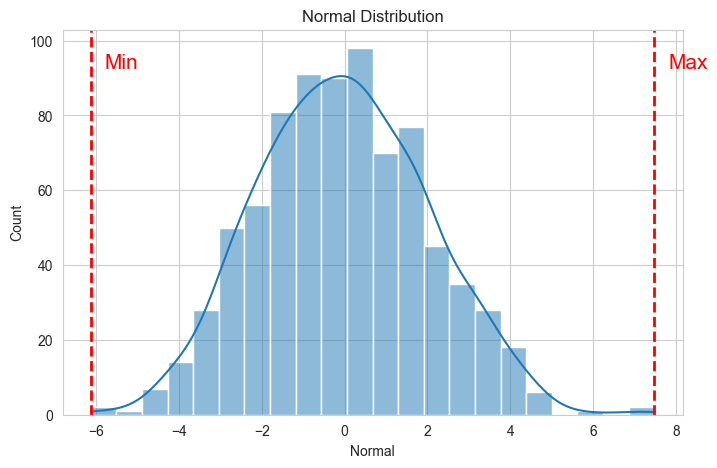

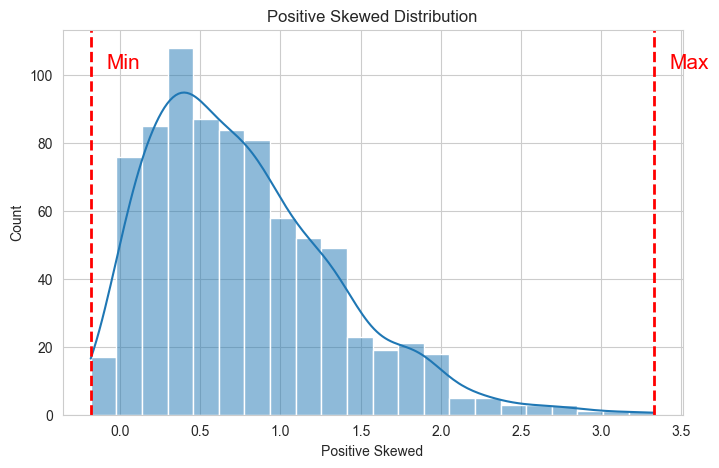

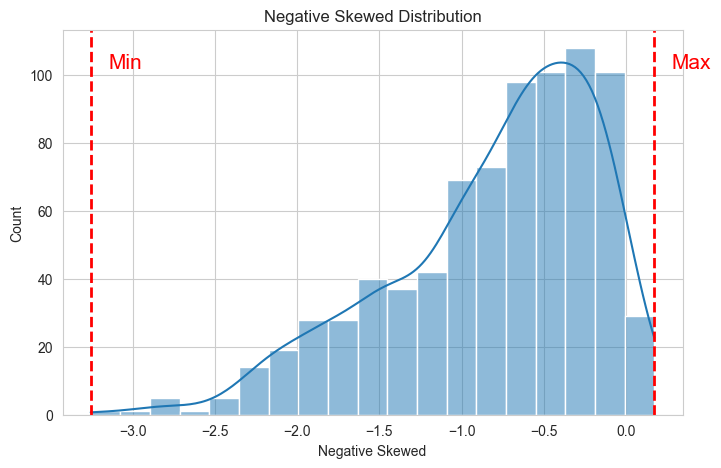

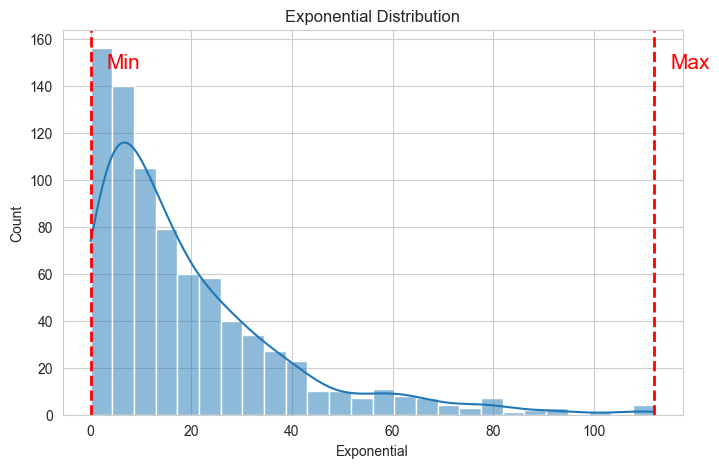

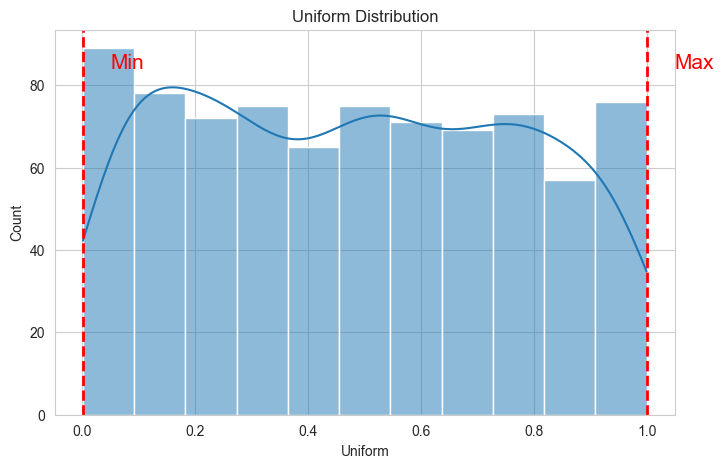

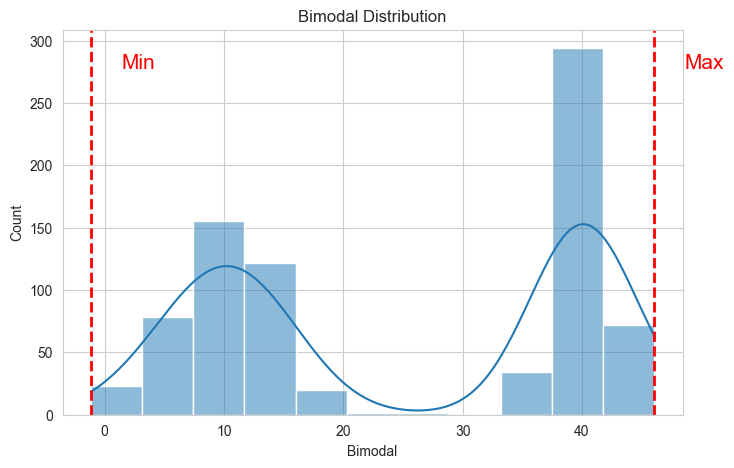

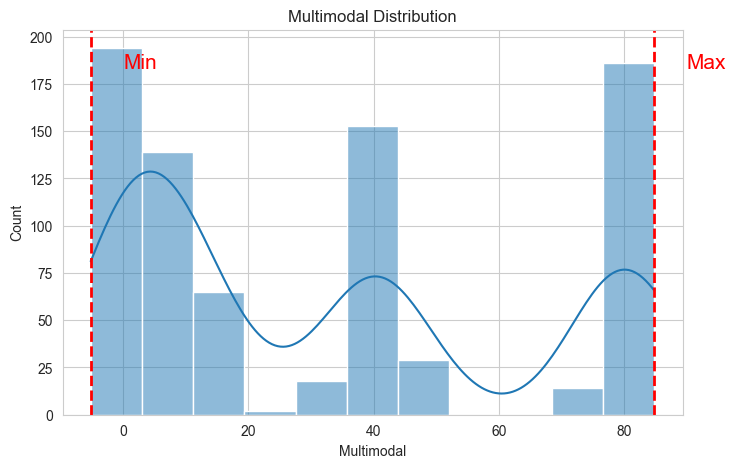

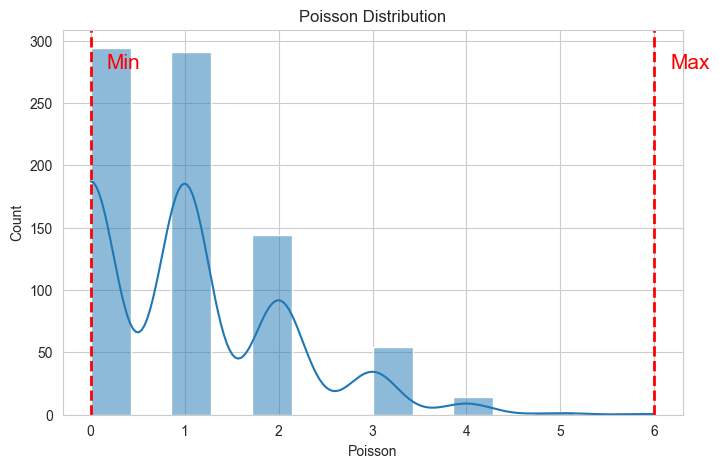

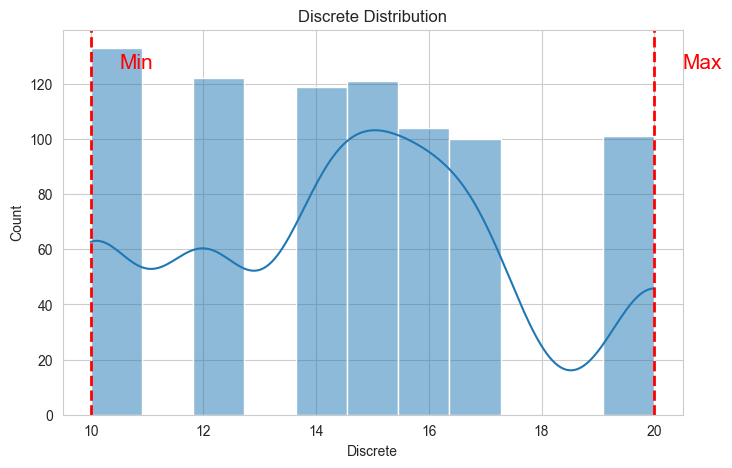

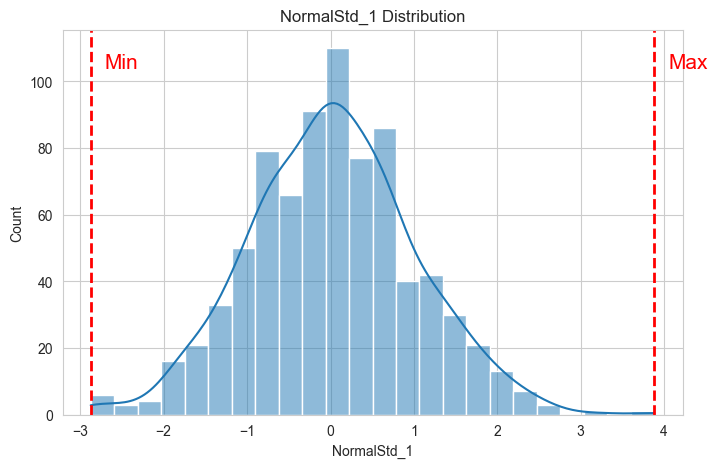

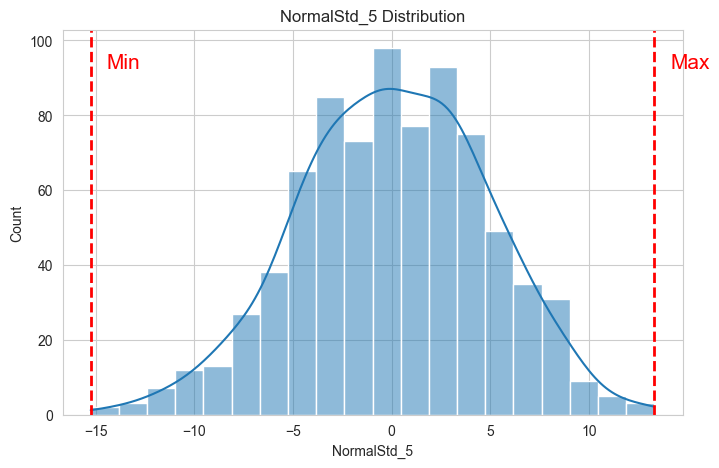

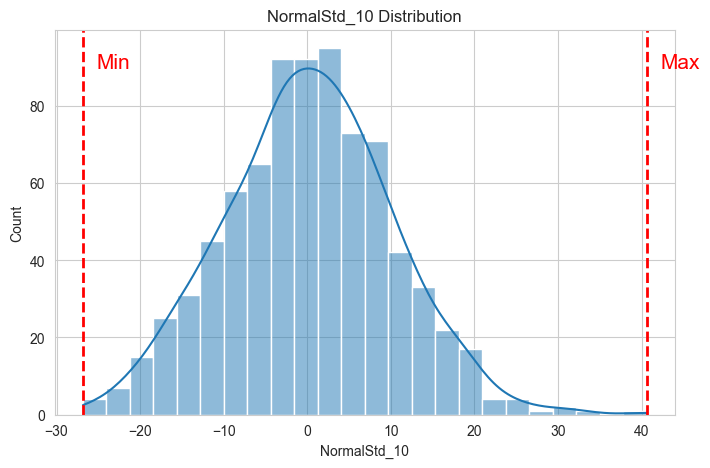

In [33]:
""" Visualize Range """
for col in df.columns:

    fig, axes = plt.subplots(figsize=(8, 5))
    plt.title(f"{col} Distribution")
    sns.histplot(data=df, x=col, kde=True)

    # Add lines and text for min
    plt.axvline(df[col].min(), color='r', linestyle='dashed', linewidth=2)
    plt.text(x=df[col].min() + df[col].std()/6, y=axes.get_ylim()
             [1] * 0.90, s='Min', fontsize=15, c='r')

    # Add lines and text for max
    plt.axvline(df[col].max(), color='r', linestyle='dashed', linewidth=2)
    plt.text(x=df[col].max() + df[col].std()/6, y=axes.get_ylim()
             [1] * 0.9, s='Max', fontsize=15, c='r')

    plt.show()
    print("\n")